# Importando os dados

In [76]:
# source "C:/Users/leand/venvs/pns/Scripts/activate"
# python -m ipykernel install --user --name=pns --display-name "pns"

import os
import pandas as pd
import seaborn as sns

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import os
from tqdm import tqdm

from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.multitest import multipletests


In [78]:
modulo_identificacao = [
    # Módulo de Identificacao
    "V0001",  # Unidade da Federação
    "V0024", # Estrato
    "UPA_PNS", # UPA
    "V0006_PNS", # Número ordem domicilio PNS
    "C00301", # Número ordem do morador
    "V0015", # Tipo da Entrevista
    "V0022", # Quantidade de moradores
    "V0026",  # Tipo de situação censitária
    "V0031", # Tipo de área Capital, Metropolitana
    "V0025A", # Seleção do morador de 15 anos ou mais para responder o questionário individual
    "V0025B", # Seleção do morador de 15 anos ou mais para ter medida antropométrica aferida
    "V0029", # Peso amostral do morador sem calibração
    "V00291", # Peso amostral do morador com calibração
    "V00282", #		Projeção da população
    "V00283", #	Domínio de projeção para domicílio e moradores
    "V00293", # Domínio de projeção para morador selecionado
    "V00303", # Domínio de projeção para morador selecionado para antropometria
    ]
modulo_C = [
    # Módulo C - Caracteristicas gerais dos moradores
    "C001", # Quantidade de pessoas no domicilio
    "C006",  # Sexo
    "C00701",  # Dia de nascimento
    "C00702",  # Mês de nascimento
    "C00703",  # Ano de nascimento
    "C008",  # Idade do morador na data de referência
    "C009",  # Cor ou Raça
]
modulo_D = [
    # Módulo D - Cartacterisiticas de Educação dos Moradores
    "D00201",  # Frequenta escola ou creche
    "D00901",  # Qual foi o curso mais elevado que ___frequentou
]
modulo_E = [
    # Módulo E - Características de Trabalho
    "E01602",  # Qual era o rendimento bruto mensal ou retirada que ___ fazia normalmente nesse trabalho?(valor em dinheiro)
    "E017", # Quantas horas ___ trabalhava normalmente, por semana, nesse trabalho?
]
modulo_G = [
    # Módulo G - Deficiecias maiores de 2 anos
    "G033",  # ___ usa óculos ou outro aparelho de auxílio para lidar com problemas de visão? 
    "G047",  #  ___ tem dificuldade permanente de enxergar? 
    "G046",  # ___ tem dificuldade permanente de enxergar mesmo usando óculos, lentes de contato ou lupas?
    "G049",  # ____________ faz uso de aparelho auditivo
    "G051",  # ____________ faz uso de implante coclear?
    "G053",  # ____________ faz uso de sistema de frequência modulada individual (sistema FM)?
    "G059",  # ___ usa algum aparelho de auxílio para se locomover?
    "G060",  # ____________ faz uso de cadeira de rodas?
    "G062",  # ____________ faz uso de bengala, muletas ou andador?
    "G064",  # ____________ faz uso de prótese?
    "G066",  # ____________ faz uso de órtese?
    "G070",  # ___ tem dificuldade permanente de caminhar ou subir degraus, mesmo usando prótese, bengala ou outro aparelho de auxílio? (Para moradores com 5 anos ou mais de idade.) OU Comparado com crianças da mesma idade, ___ tem dificuldade permanente para caminhar, mesmo usando prótese, bengala ou aparelho de auxílio? (Para moradores com 2 a 4 anos de idade.)
    "G072",  # ___ usa algum aparelho de auxílio para realizar movimentos com os membros superiores?
    "G073",  # ____________ faz uso de prótese para os membros superiores?
    "G079",  #  ___tem dificuldade permanente para levantar uma garrafa com dois litros de água da cintura até a altura dos olhos, mesmo usando prótese ou aparelho de auxílio? (Somente para moradores com 5 anos ou mais de idade.)
    "G083",  # Por causa de alguma limitação nas funções mentais ou intelectuais, _________ tem dificuldade permanente para realizar atividades habituais, como se comunicar, realizar cuidados pessoais, trabalhar, ir à escola, brincar, etc.? (Para moradores com 5 anos ou mais de idade.) OU Por causa de alguma limitação nas funções mentais ou intelectuais, _________ tem dificuldade permanente para realizar atividades habituais, como frequentar a escola, brincar e etc.? (Para moradores com 2 a 4 anos de idade.)
    "G084",  # Nos últimos doze meses ___ recebe ou recebeu, algum cuidado em reabilitação de forma regular? (Por reabilitação quero dizer fisioterapia, terapia ocupacional, fonoaudiologia psicoterapia etc.)
]

modulo_J =  [
    # Utilização de Serviços de saude
    'J001', # estado de saude
    'J007', # doença cronica
    'J012', # Quantidade de consultas médicas no ultimos 12 meses
    "J00402", #  Qual foi o principal motivo de saúde que impediu ___ de realizar suas atividades habituais nas duas últimas semanas
]

modulo_L = [
    # Módulo L - Crianças com menos de dois anos
    "L019",  # Alguma vez ___________ recebeu Sulfato Ferroso? 
    "L021",  # Foi realizado o teste do pezinho?
    "L033",  # O teste do coraçãozinho realizado deu resultado alterado?
    "L037",  # Vacina Penta (também chamada de Pentavalente, DTP/Hib/HB)
    "L038",  # Vacina Poliomielite (também chamada de gotinha, VIP, VOP, PÓLIO, ANTIPÓLIO, POLIOMIELITE, SABIN)
    "L039",  # Vacina Pneumocócica (também chamada de Pneumo 10, Pneumo 13, Pncc)
    "L040",  # Vacina Tríplice Viral (também chamada SCR, TRIVIRAL, TV, MMR).
    "L01701",  # Leite materno?
    "L018",  # Desde que ___________nasceu, tomou ou comeu outro alimento que não leite materno?
    "L019",  # Alguma vez ___________ recebeu Sulfato Ferroso?
]
modulo_P = [
    # Módulo P - Estilos de Vida
    "P00103",  # Peso - Informado (em kg) (3 inteiros e 1 casa decimal)
    "P00104",  # Peso - Final (em kg) (3 inteiros e 1 casa decimal)
    "P00403",  # Altura - Informada (em cm) (3 inteiros)
    "P00404",  # Altura - Final (em cm) (3 inteiros)
    "P027",    # Com que frequência o(a) Sr(a) costuma consumir alguma bebida alcoólica?
    "P035",    # Quantos dias por semana o(a) Sr(a) costuma  (costumava)praticar exercício físico ou esporte?
    "P050", # Atualmente, o(a) Sr(a) fuma algum produto do tabaco?
    "P052", # E no passado, o(a) Sr(a) fumou algum produto do tabaco?
]
modulo_Q = [
    # Módulo Q - Doenças crônicas
    "Q00201",  # Algum médico já lhe deu o diagnóstico de hipertensão arterial (pressão alta)?
    "Q00202",  # Essa hipertensão arterial (pressão alta) ocorreu apenas durante algum período de gravidez?
    "Q003",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico de hipertensão arterial (pressão alta)?
    "Q028",  # Em geral, em que grau a hipertensão ou alguma complicação da hipertensão limita as suas atividades habituais (como trabalhar, estudar, realizar afazeres domésticos etc.)?
    "Q03001",  # Algum médico já lhe deu o diagnóstico de diabetes?
    "Q03002",  # Esse diabetes ocorreu apenas durante algum período de gravidez?
    "Q031",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico do diabetes?
    "Q055011",  # Problemas na vista
    "Q055012",  # Infarto ou AVC (Acidente Vascular cerebral) /derrame ou outro problema circulatório
    "Q055013",  # Problema nos rins
    "Q060",  # Algum médico já lhe deu o diagnóstico de colesterol alto?
    "Q061",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico de colesterol alto?
    "Q06306", # um médico já lhe deu o diagnóstico de uma doença do coração, tal como infarto, angina, insuficiência cardíaca ou outra?
    "Q06307",  # Infarto
    "Q06308",  # Angina
    "Q06309",  # Insuficiência cardíaca
    "Q06310",  # Arritmia
    "Q064",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico da doença do coração?
    "Q068",  # Algum médico já lhe deu o diagnóstico de AVC (Acidente Vascular Cerebral) ou derrame?
    "Q070",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico do derrame (ou AVC)?
    "Q074",  # Algum médico já lhe deu o diagnóstico de asma (ou bronquite asmática)?
    "Q075",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico de asma?
    "Q079",  # Algum médico já lhe deu o diagnóstico de artrite ou reumatismo?
    "Q080",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico de artrite ou reumatismo?
    "Q084",  # O(a) Sr(a) tem algum problema crônico de coluna, como dor crônica nas costas ou no pescoço, lombalgia, dor ciática, problemas nas vértebras ou disco?
    "Q085",  # Que idade o(a) Sr(a) tinha quando começou o problema na coluna?
    "Q087",  # Em geral, em que grau o problema na coluna limita as suas atividades habituais (tais como trabalhar, realizar afazeres domésticos, etc.)?
    "Q088",  # Algum médico já lhe deu o diagnóstico de DORT?
    "Q08901",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico de DORT?
    "Q091",  # Em geral, em que grau o DORT limita as suas atividades habituais (tais como trabalhar, realizar afazeres domésticos etc.)?
    "Q092",  # Algum médico ou profissional de saúde mental (como psiquiatra ou psicólogo) já lhe deu o diagnóstico de depressão?
    "Q09301",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico de depressão?
    "Q109",  # Em geral, em que grau a depressão limita as suas atividades habituais (tais como trabalhar, realizar afazeres domésticos, etc.)?
    "Q11006", #Algum médico ou profissional de saúde (como psiquiatra ou psicólogo) já lhe deu o diagnóstico de outra doença mental, como transtorno de ansiedade, síndrome do pânico, esquizofrenia, transtorno bipolar, psicose ou TOC (Transtorno Obsessivo Compulsivo) etc?
    "Q11007",  # Diagnóstico de Esquizofrenia
    "Q11008",  # Diagnóstico de Transtorno bipolar
    "Q11009",  # Diagnóstico de TOC (Transtorno obsessivo compulsivo)
    "Q111",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico de doença mental?
    "Q11604",  # Algum médico já lhe deu o diagnóstico de alguma outra doença crônica no pulmão, tais como enfisema pulmonar, bronquite crônica ou DPOC (Doença Pulmonar Obstrutiva Crônica)?
    "Q11605",  # Diagnóstico de enfisema pulmonar
    "Q11606",  # Diagnóstico de bronquite crônica
    "Q11701",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico dessa(s) doença(s) no pulmão?
    "Q120",  # Algum médico já lhe deu diagnóstico de câncer?
    "Q12201",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico de doença mental?
    "Q124",  # Algum médico já lhe deu o diagnóstico de insuficiência renal crônica?
    "Q125",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico de insuficiência renal crônica?
    "Q128", # Algum médico já lhe deu algum diagnóstico de outra doença crônica (física ou mental) ou doença de longa duração (de mais de 6 meses de duração)?
]
modulo_R = [
    # Módculo R - Saúde da Mulher - 15 anos ou mais
    "R011", # Segundo o médico, qual o motivo da retirada do útero?
    "R025",  # Com que idade a sra ficou menstruada pela primeira vez?
    "R026",  # A sra ainda fica menstruada?
    "R027",  # Com que idade a sra parou de menstruar?
    "R028",  # A sra já entrou na menopausa?
    "R029",  # Alguma vez a sra fez ou faz tratamento hormonal para alívio dos sintomas da menopausa (com comprimidos, adesivos, gel ou injeções)?
    "R034",  # A sra usa algum método para evitar a gravidez atualmente?
    "R035",  # Qual o principal motivo de não evitar a gravidez?
    "R03601",  # Pilula?
    "R037",  # A sra e/ou seu companheiro já fizeram ou fazem algum tratamento para engravidar?
    "R038",  # Há quanto tempo a sra está tentando engravidar?
]
modulo_S = [
    # Módulo S - Atendimento pré-natal e parto - 15 anos ou mais
    "S065",  # Alguma vez ficou grávida, mesmo que a gravidez não tenha chegado até o final?
    "S066",  # Quantos partos a Sra já teve?
    "S06703",  # Em que data foi o último parto? ANO
    "S068",  # Quando estava grávida fez alguma consulta de pré-natal?
    "S06901",  # Quantas tempo de gravidez tinha quando fez a primeira consulta pré-natal?
    "S06902",  # Quantas tempo de gravidez tinha quando fez a primeira consulta pré-natal?
    "S070",  # Quantas consultas de pré-natal fez durante esta gravidez?
    "S080",  # Durante o pré-natal de ______, foi realizado teste/exame para sífilis?
    "S082",  # Qual foi o resultado do teste/exame para sífilis?
    "S083",  # Recebeu tratamento para sífilis?
    "S086",  # Qual foi o resultado do teste/exame para sífilis do seu parceiro?
    "S087",  # O seu parceiro foi tratado?
    "S095",  # Durante o pré-natal a Sra foi orientada a usar preservativo?
    "S096",  # Quanto tempo antes do parto a Sra foi à última consulta do pré-natal?
    "S098",  # Quando estava grávida tomou alguma injeção para prevenir o bebê contra difteria e tétano (mal dos sete dias) – dT ou dTpa?
    "S099",  # Quantas doses dessa injeção tomou durante esta gravidez?
    "S09901",  # Número de doses
    "S110",  # Qual foi o peso dele(a) ao nascer?
    "S11001",  # Peso ao nascer (em quilogramas)
    "S112",  # Onde foi realizado o parto?
    "S115",  # Qual foi o tipo de parto?
    "S116",  # Nesta gravidez, entrou em trabalho de parto?
    "S117",  # Qual o principal motivo de ter tido parto cesáreo?
    "S118",  # Quantas semanas de gravidez tinha no momento do parto?
    "S11801",  # Quantidade de semanas
    "S125",  # Teve alguma complicação durante o parto?
    "S126",  # Você teve alguma complicação após o parto?
    "S127",  # Por causa dessa complicação precisou ser internada?
    "S130",  # Durante a primeira hora após o nascimento, seu(sua) filho(a) foi colocado(a) em contato com você pele a pele?
    "S131",  # Depois do nascimento, ele(a) ficou com você no quarto até a alta hospitalar?
    "S132",  # Seu(sua) filho(a) saiu do hospital junto com você?
    "S133",  # A criança não saiu do hospital junto com você porque:
    "S134",  # Você fez consulta de puerpério (consulta com médico ou enfermeiro até 42 dias após o parto)?
    "S136",  # Durante os primeiros três meses após o parto, você tomou medicamento contendo somente ferro ou ferro com vitaminas?
]

modulo_T = [
    # Módulo de DST
    "T004", #Nos últimos 12 meses, algum médico lhe deu diagnóstico de doença/infecção sexualmente transmissível?

]
modulo_W = [
    # Módulo W - Antropometria
    "W001",  # Antropometria aferida do morador selecionado
    "W00101",  # Peso - 1ª pesagem (em kg)(3 inteiros e 1 casa decimal)
    "W00102",  # Peso - 2ª pesagem (em kg)(3 inteiros e 1 casa decimal)
    "W00103",  # Peso - Final (em kg)(3 inteiros e 1 casa decimal)
    "W00201",  # Altura - 1ª medição (em cm)(3 inteiros e 1 casa decimal)
    "W00202",  # Altura - 2ª medição (em cm)(3 inteiros e 1 casa decimal)
    "W00203",  # Altura - Final (em cm)(3 inteiros e 1 casa decimal)
    "VDL001",  # Idade em meses das crianças nascidas no período de referência do Módulo L
]

modulo_derivadas = [
    "VDE014", #Grupamentos de atividade do trabalho principal da semana de referência para pessoas de 14 anos ou mais de idade
    "VDF004", # Faixa de rendimento domiciliar per capita (exclusive o rendimento das pessoas cuja condição na unidade domiciliar era pensionista, empregado doméstico ou parente do
]

In [79]:
df_criancas = pd.read_csv("https://raw.githubusercontent.com/LeandroCoelhos/Notebook_PNS/refs/heads/ampliado/data/df_criancas_v2.csv")
df_maes = pd.read_csv("https://raw.githubusercontent.com/LeandroCoelhos/Notebook_PNS/refs/heads/ampliado/data/df_maes_v2.csv")

df_aux = pd.merge(df_criancas, df_maes, on="chave_domicio", how="inner")

df_criancas.shape, df_maes.shape, df_aux.shape

((25353, 220), (9794, 218), (9986, 437))

In [80]:
df_aux

,V0001_x,V0024_x,UPA_PNS_x,V0006_PNS_x,V0015_x,V0022_x,V0026_x,V0031_x,V0025A_x,V0025B_x,...,peso_ao_nascer,Classificação Idade Gestacional,Risco de Insulto Perinatal,Complicações Perinatais,fumante_atual,comorbidade,comorbidade_score,faixa_renda,idade_ultimo_parto,parto_idade_avançada
0,11,1110011,110000016,5,1,2.0,1,1,9.0,NaN,...,Adequado,NaN,Não,Não,NaN,Não,0,NaN,28.0,0
1,11,1110011,110000034,10,1,2.0,1,1,9.0,NaN,...,Adequado,Prematuro extremo,Sim,Sim,NaN,Sim,1,≥5 SM,33.0,0
2,11,1110011,110000584,14,1,5.0,1,1,9.0,NaN,...,NaN,NaN,Não,Não,NaN,Não,0,NaN,24.0,0
3,11,1110011,110002149,2,1,4.0,1,1,9.0,NaN,...,NaN,NaN,Não,Não,NaN,Não,0,NaN,22.0,0
4,11,1110011,110002149,14,1,2.0,1,1,9.0,NaN,...,NaN,A termo,Não,Não,NaN,Não,0,NaN,23.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,53,5310220,530038867,6,1,3.0,2,1,9.0,NaN,...,NaN,NaN,Não,Não,NaN,Não,0,NaN,21.0,0
9982,53,5310220,530044434,8,1,6.0,2,1,9.0,NaN,...,Baixo peso,A termo,Não,Não,NaN,Não,0,NaN,25.0,0
9983,53,5310220,530044434,8,1,6.0,2,1,9.0,NaN,...,Baixo peso,A termo,Não,Não,NaN,Não,0,NaN,25.0,0
9984,53,5310220,530044434,11,1,4.0,2,1,9.0,NaN,...,NaN,NaN,Não,Não,NaN,Não,0,NaN,28.0,0


## Fazer o cruzamento dos Datasets para criar os CLusters de interesse

In [81]:
df_aux = df_aux[['chave_domicio']].drop_duplicates().reset_index(drop=True)
df_aux['filho'] = 1
df_aux.shape

(7843, 2)

In [82]:
df_grupo_maes = pd.merge(df_maes, df_aux, on="chave_domicio", how="inner" )
df_grupo_maes['filho'] = df_grupo_maes['filho'].fillna(0)
df_grupo_maes.shape

(7843, 219)

In [83]:
df_grupo_maes.parto_idade_avançada.value_counts()

parto_idade_avançada
0    6311
1    1532
Name: count, dtype: int64

In [84]:
# Remove as crianças mais velhas, no questionáio diz respeito a mais nova
df_criancas = df_criancas.sort_values(by='idade').drop_duplicates(subset=['chave_domicio'], keep='first').reset_index(drop=True)

In [85]:
# Criar um grupo de filhos com maes em idade avançada
df_grupo_criancas = pd.merge(df_criancas, df_grupo_maes[['chave_domicio', 'idade_ultimo_parto', 'parto_idade_avançada']], on="chave_domicio", how="inner" )
df_grupo_criancas.shape

(7843, 222)

In [86]:
df_grupo_criancas.chave_domicio.value_counts()

chave_domicio
53_5310220_530037924_7     1
53_5310220_530025265_9     1
14_1410011_140006628_9     1
32_3253011_320038691_15    1
11_1110011_110018052_6     1
                          ..
11_1110011_110005446_5     1
27_2752020_270005797_12    1
27_2752020_270004641_6     1
27_2752020_270005797_3     1
50_5010011_500024535_12    1
Name: count, Length: 7843, dtype: int64

In [87]:
# Quero ver as variaveis das crianças que me interessam
# tem influencia na saude da criança?
# elas se referem a criança mais nova?
# retira as mais velhas?

# Trasformar variaveis em categoricas para facilitar os plots

In [88]:
def transformar_categorica(df):
    df = df.copy()
    # Verificar número de valores únicos por coluna
    unique_counts = df.nunique()

    # Identificar colunas com poucos valores únicos
    categorical_candidates = unique_counts[unique_counts < 20].index
    print("Colunas que podem ser categorizadas:", categorical_candidates)

    # Converter automaticamente as candidatas para categorias
    df[categorical_candidates] = df[categorical_candidates].astype('category')

    return df

df_grupo_maes = transformar_categorica(df_grupo_maes)
df_grupo_criancas = transformar_categorica(df_grupo_criancas)

Colunas que podem ser categorizadas: Index(['V0006_PNS', 'V0015', 'V0022', 'V0026', 'V0031', 'V0025A', 'V0025B',
       'C001', 'C00301', 'C006',
       ...
       'peso_ao_nascer', 'Classificação Idade Gestacional',
       'Risco de Insulto Perinatal', 'Complicações Perinatais',
       'fumante_atual', 'comorbidade', 'comorbidade_score', 'faixa_renda',
       'parto_idade_avançada', 'filho'],
      dtype='object', length=153)
Colunas que podem ser categorizadas: Index(['V0006_PNS', 'V0015', 'V0022', 'V0026', 'V0031', 'V0025A', 'V0025B',
       'C001', 'C00301', 'C006',
       ...
       'L039_bin', 'L040_bin', 'num_vacinas', 'cobertura_completa',
       'L037_status', 'L038_status', 'L039_status', 'L040_status',
       'estado_vacinal', 'parto_idade_avançada'],
      dtype='object', length=206)


In [89]:
num_partos_dict = {
    1: "Uma",
    2: "Duas",
    3: "Três",
    4: "Quatro",
    5: "Cinco",
    6: "Seis",
    7: "Sete ou mais",
    8: "Não sabe/Não lembra",
    9: "Ignorado"
}

# Compara Grupo de Mães de Idade Avançada e Idade Não Avançada

In [90]:
modulo_R = [
    # Módculo R - Saúde da Mulher - 15 anos ou mais
    "R037",  # A sra e/ou seu companheiro já fizeram ou fazem algum tratamento para engravidar?
    "R038",  # Há quanto tempo a sra está tentando engravidar?
]

modulo_S = [
    # Módulo S - Atendimento pré-natal e parto - 15 anos ou mais
    "S066",  # Quantos partos a Sra já teve?
    "S115",  # Qual foi o tipo de parto?
    "S125",  # Teve alguma complicação durante o parto?
    "S070", # Quantas consultas de pré-natal fez durante esta gravidez?
]

modulo_criado = [
 'idade_ultimo_parto',
 'UF_sigla',
 'regiao_brasileira',
 'imc_classificacao',
 'escolaridade',
#  'peso_ao_nascer',
 'Classificação Idade Gestacional',
 'Risco de Insulto Perinatal',
 'Complicações Perinatais',
 'comorbidade',
#  'comorbidade_score',
 'raca',
 'faixa_renda'
 ]

colunas_interesse = modulo_R + modulo_S + modulo_criado

dicionario_variaveis = {
    "C006": "Sexo",
    "C008":  "Idade do morador na data de referência",
    "G046": " ___ tem dificuldade permanente de enxergar mesmo usando óculos, lentes de contato ou lupas?",
    "G072": "___ usa algum aparelho de auxílio para realizar movimentos com os membros superiores?",
    "G073":" ____________ faz uso de prótese para os membros superiores?",
    "G079":"  ___tem dificuldade permanente para levantar uma garrafa com dois litros de água da cintura até a altura dos olhos, mesmo usando prótese ou aparelho de auxílio? (Somente para moradores com 5 anos ou mais de idade.)",
    "G083":" Por causa de alguma limitação nas funções mentais ou intelectuais, _________ tem dificuldade permanente para realizar atividades habituais, como se comunicar, realizar cuidados pessoais, trabalhar, ir à escola, brincar, etc.? (Para moradores com 5 anos ou mais de idade.) OU Por causa de alguma limitação nas funções mentais ou intelectuais, _________ tem dificuldade permanente para realizar atividades habituais, como frequentar a escola, brincar e etc.? (Para moradores com 2 a 4 anos de idade.)",
    "G084":"Nos últimos doze meses ___ recebe ou recebeu, algum cuidado em reabilitação de forma regular? (Por reabilitação quero dizer fisioterapia, terapia ocupacional, fonoaudiologia psicoterapia etc.)",
    "R037": "A sra e/ou seu companheiro já fizeram ou fazem algum tratamento para engravidar?",
    "R038": "Há quanto tempo a sra está tentando engravidar?",
    "S065": "Alguma vez ficou grávida, mesmo que a gravidez não tenha chegado até o final?",
    "S066":"Quantos partos a Sra já teve?",
    "S070":"Quantas consultas de pré-natal fez durante esta gravidez?",
    "S115":"Qual foi o tipo de parto?",
    "S125":"Teve alguma complicação durante o parto?",
}


dicionario_valores = {
    "C006": {
        1: "Homem",
        2: "Mulher"
    },
    "C008": "Numerico",
    "G046":{
        1: "Não, nenhuma dificuldade",
        2: "Sim, alguma dificuldade",
        3: "Sim, muita dificuldade",
        4: "Sim, não consegue de modo algum",
        9: "Ignorado"
    },
    "G072":{
        1: "Sim",
        2: "Não",
        9: "Ignorado"
    },
    "G073": {
        1: "Sim",
        2: "Não",
        9: "Ignorado"
    },
    "G079":{
        1: "Não, nenhuma dificuldade",
        2: "Sim, alguma dificuldade",
        3: "Sim, muita dificuldade",
        4: "Sim, não consegue de modo algum",
        9: "Ignorado"
    },
    "G083":{
        1: "Não, nenhuma dificuldade",
        2: "Sim, alguma dificuldade",
        3: "Sim, muita dificuldade",
        4: "Sim, não consegue de modo algum",
        9: "Ignorado"
    },
    "G084":{
        1: "Sim",
        2: "Não",
        9: "Ignorado"
    },
    "R037":{
        1: "Sim, fazem atualmente",
        2: "Sim, já fizeram",
        3: "Nunca fizeram",
        9: "Ignorado"
    },
    "R038":{
        1: "Há menos de 6 meses",
        2: "De 6 meses a menos de 1 ano",
        3: "Há 1 ano ou mais",
        9: "Ignorado"
    },
    "S065":{
        1: "Sim",
        2: "Não",
        9: "Ignorado"
    },
    "S066":"Numerico",
    "S115":{
        1: "Parto normal/vaginal",
        2: "Cesariana",
        9: "Ignorado"
    },
    "S125":{
        1: "Sim",
        2: "Não",
        9: "Ignorado"
    },
    "S070":{
        1: "Uma",
        2: "Duas",
        3: "Três",
        4: "Quatro",
        5: "Cinco",
        6: "Seis",
        7: "Sete ou mais",
        8: "Não sabe/Não lembra",
        9: "Ignorado"
    }
}

## Plots Nomralizados


In [91]:
from scipy.stats import chi2_contingency

In [92]:
def plot_with_weights_and_normalization(df, x_col, hue_col, cat_order=None):
    df = df.copy()
    """
    Plota gráficos usando pesos amostrais e normaliza os dados dentro de cada categoria de `hue_col`.
    - Se `x_col` for categórica, usa um countplot com pesos e normalização.
    - Se `x_col` for numérica, usa um histplot ponderado e normalizado.

    :param df: DataFrame contendo os dados.
    :param x_col: Nome da coluna a ser usada no eixo X.
    :param hue_col: Nome da coluna a ser usada como hue.
    """
    if x_col not in df.columns or hue_col not in df.columns:
        raise ValueError(f"As colunas {x_col} ou {hue_col} não estão presentes no DataFrame.")

    # Verificar se a coluna tem apenas NaN
    if df[x_col].dropna().empty:
        print(f"A coluna {x_col} não possui dados válidos (apenas NaN). Gráfico não será gerado.")
        return

    # Verificar se a coluna é numérica ou categórica
    if pd.api.types.is_numeric_dtype(df[x_col]):
        # Normalizar os pesos dentro de cada grupo do hue
        df['normalized_weight'] = df.groupby(hue_col, observed=True)['peso_morador_selec'].transform(lambda x: x / x.sum())

        # Plotar histograma normalizado usando os pesos ajustados
        plt.figure(figsize=(12, 7))
        sns.histplot(
            data=df, x=x_col, hue=hue_col, weights=df['normalized_weight'],
            bins=20, multiple='dodge', palette="Set2", kde=False
        )
        plt.title(f"Distribuição Normalizada de {x_col} com {hue_col}", fontsize=14)
        plt.xlabel(x_col, fontsize=12)
        plt.ylabel("Frequência Normalizada", fontsize=12)
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

    elif isinstance(df[x_col].dtype, pd.CategoricalDtype) or df[x_col].dtype == 'object':
        df[x_col] = df[x_col].dropna().astype(str)

        # Agrupar e normalizar os pesos dentro de cada categoria do hue_col
        normalized_df = (
            df[[x_col, hue_col, 'peso_morador_selec']]
            .dropna()
            .groupby([hue_col, x_col], observed=False)
            .agg({'peso_morador_selec': 'sum'})
            .reset_index()
        )

        # Normalizar por proporção dentro de cada grupo hue_col
        normalized_df['proportion'] = normalized_df.groupby(hue_col, observed=True)['peso_morador_selec'].transform(lambda x: x / x.sum())

        # Plotar gráfico de barras com pesos normalizados
        plt.figure(figsize=(12, 7))
        ax = sns.barplot(
            data=normalized_df, x=x_col, y="proportion", hue=hue_col, palette="Set2", order=cat_order
        )

        # Adicionar porcentagens acima das barras
        for container in ax.containers:
            ax.bar_label(
                container,
                labels=[f"{v.get_height() * 100:.1f}%" for v in container],
                label_type="edge",
                fontsize=10
            )

        # Configuração do gráfico
        plt.title(f"Distribuição Normalizada de {x_col} com {hue_col} (Pesos Ajustados)", fontsize=14)
        plt.xlabel(x_col, fontsize=12)
        plt.ylabel("Proporção Normalizada", fontsize=12)
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

    else:
        raise ValueError(f"O tipo de dado da coluna {x_col} não é suportado para este gráfico.")

### Teste Qui-Quadrado

In [93]:
def teste_qui_quadrado(df, coluna1, coluna2):
    df = df.copy()
    """
    Realiza o teste do qui-quadrado para verificar a independência entre duas variáveis categóricas.
    - H0: As variáveis são independentes.
    - H1: As variáveis são dependentes.

    :param df: DataFrame contendo os dados.
    :param coluna1: Nome da primeira coluna categórica.
    :param coluna2: Nome da segunda coluna categórica.
    """
    if coluna1 not in df.columns or coluna2 not in df.columns:
        raise ValueError(f"As colunas {coluna1} ou {coluna2} não estão presentes no DataFrame.")

    # Verificar se as colunas são categóricas
    if not isinstance(df[coluna1].dtype, pd.CategoricalDtype) or not isinstance(df[coluna2].dtype, pd.CategoricalDtype):
        raise ValueError("Ambas as colunas devem ser categóricas para realizar o teste do qui-quadrado.")

    # Tabela de contingência
    contingency_table = pd.crosstab(df[coluna1], df[coluna2], margins=False, values=df['peso_morador_selec'],aggfunc='sum')

    # Teste do qui-quadrado
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Resultado do teste
    print(f"Qui-Quadrado: {chi2}")
    print(f"p-valor: {p}")
    print(f"Graus de Liberdade: {dof}")
    print("\nTabela de Contingência:")
    display(contingency_table)

    # Para as categorias individuais Teste-Z de proporções
    # Soma total dos pesos (ou contagens) por linha (cada grupo):
    row_sums = contingency_table.sum(axis=1)

    # Precisamos percorrer as colunas (categorias) e realizar um teste de duas proporções
    pvals = []
    stat_list = []

    for category in contingency_table.columns:
        # count1 = numero de individuos (ou soma de pesos) com IMC == category, no grupo 0
        count1 = contingency_table.loc[0, category]
        # count2 = idem, no grupo 1
        count2 = contingency_table.loc[1, category]

        # nobs1 = total de individuos (ou total de pesos) no grupo 0
        nobs1 = row_sums.loc[0]
        # nobs2 = total de individuos (ou total de pesos) no grupo 1
        nobs2 = row_sums.loc[1]

        # Prepara entradas:
        counts = np.array([count1, count2])
        nobs = np.array([nobs1, nobs2])

        stat, pval = proportions_ztest(counts, nobs, alternative='two-sided')
        pvals.append(pval)
        stat_list.append(stat)

    # Correção para múltiplas comparações (Bonferroni, Holm, FDR, etc.):
    rejected, pvals_corrected, _, _ = multipletests(pvals, alpha=0.05, method='bonferroni')

    # Montar resultado em tabela
    results_df = pd.DataFrame({
        'Category': contingency_table.columns,
        'Z_stat': stat_list,
        'p_value': pvals,
        'p_value_corrected': pvals_corrected,
        'reject_H0_after_correction': rejected
    })

    print("\nResultados dos Testes de Proporção (Corrigidos):")
    display(results_df)


# Grafico

In [94]:
def grafico_teste(df, x_col, hue_col='parto_idade_avançada', cat_order=None):
    df = df.copy()
    plot_with_weights_and_normalization(df, x_col, hue_col, cat_order=cat_order)
    teste_qui_quadrado(df, hue_col, x_col)

### escolaridade

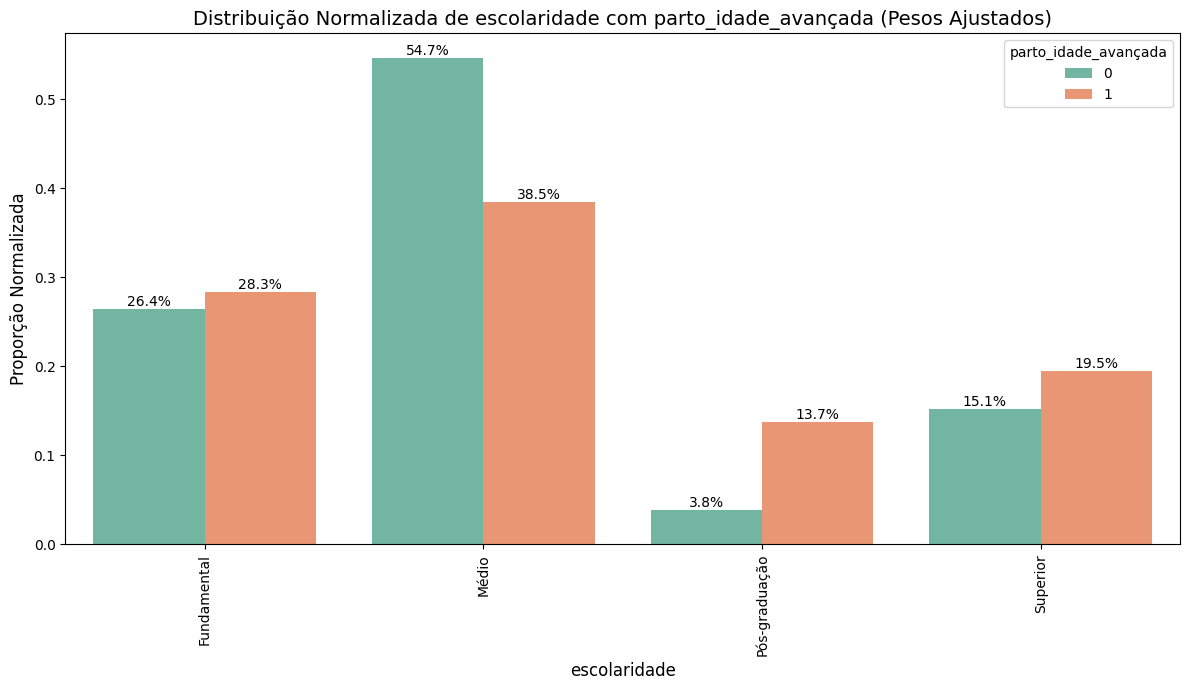

Qui-Quadrado: 265.3318426838309
p-valor: 3.157801421101062e-57
Graus de Liberdade: 3

Tabela de Contingência:


escolaridade,Fundamental,Médio,Pós-graduação,Superior
parto_idade_avançada,,,,
0,1502.007275,3113.704764,216.827399,862.547993
1,404.896336,549.780091,195.276438,278.367476



Resultados dos Testes de Proporção (Corrigidos):


,Category,Z_stat,p_value,p_value_corrected,reject_H0_after_correction
0,Fundamental,-1.506600,1.319133e-01,5.276531e-01,False
1,Médio,10.941143,7.327064e-28,2.930825e-27,True
2,Pós-graduação,-14.278232,2.990913e-46,1.196365e-45,True
3,Superior,-4.002178,6.276207e-05,2.510483e-04,True


In [ ]:
grafico_teste(df_grupo_maes, x_col='escolaridade', hue_col='parto_idade_avançada', cat_order=['Fundamental', 'Médio', 'Pós-graduação', 'Superior'])

### idade_ultimo_parto

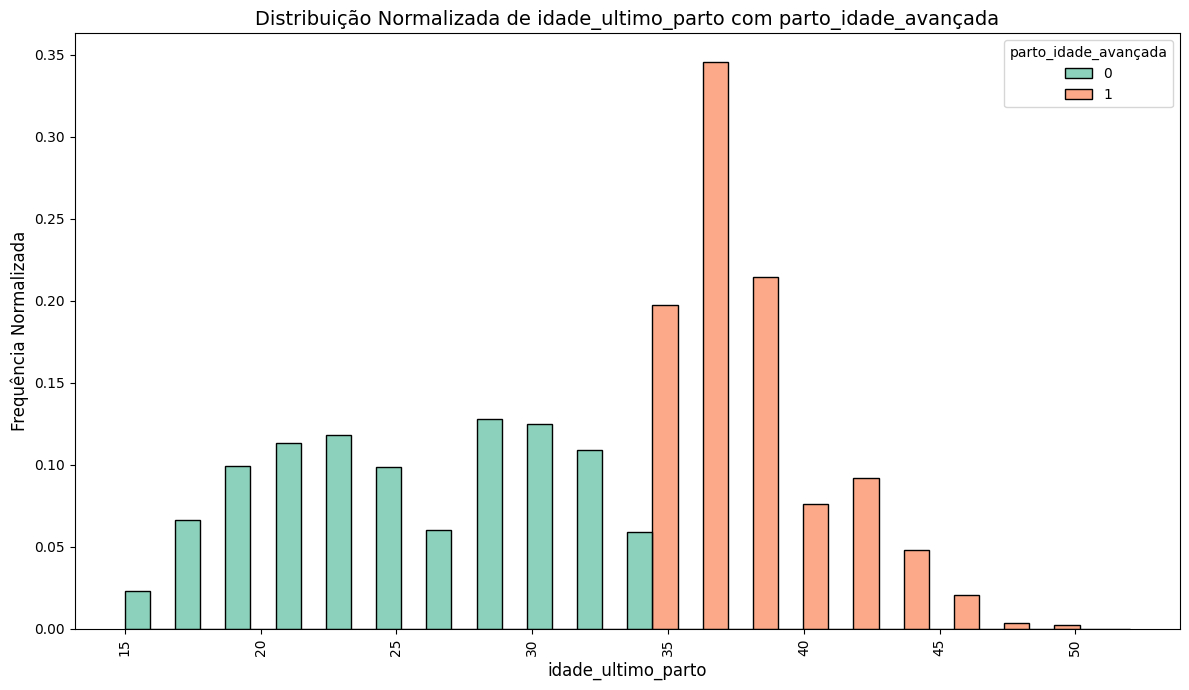

In [ ]:
plot_with_weights_and_normalization(df_grupo_maes, 'idade_ultimo_parto', 'parto_idade_avançada')

### 'A sra e/ou seu companheiro já fizeram ou fazem algum tratamento para engravidar?

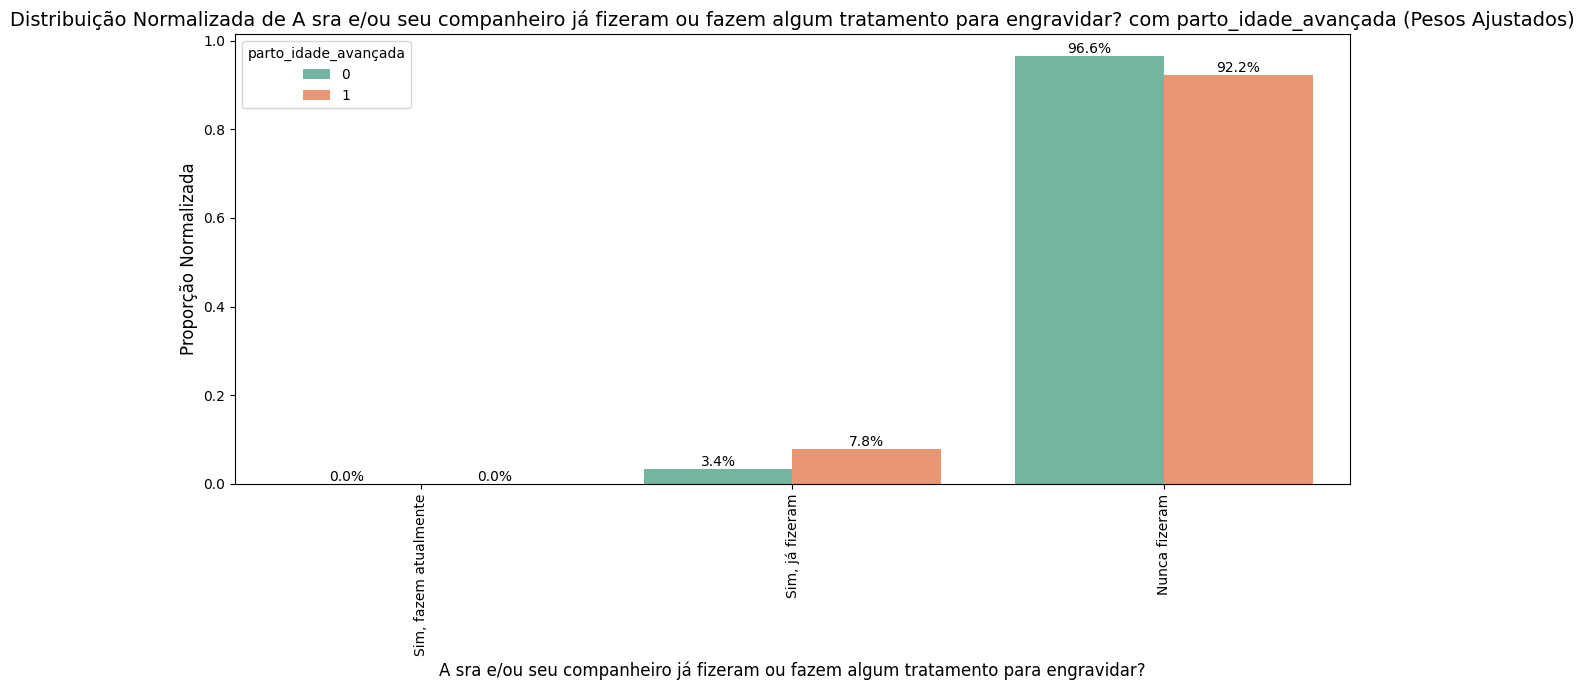

Qui-Quadrado: 54.04274961735521
p-valor: 1.839780566644841e-12
Graus de Liberdade: 2

Tabela de Contingência:


A sra e/ou seu companheiro já fizeram ou fazem algum tratamento para engravidar?,"Sim, fazem atualmente","Sim, já fizeram",Nunca fizeram
parto_idade_avançada,,,
0,1.063336,198.303439,5696.622569
1,0.000000,104.146535,1227.618211



Resultados dos Testes de Proporção (Corrigidos):


,Category,Z_stat,p_value,p_value_corrected,reject_H0_after_correction
0,"Sim, fazem atualmente",0.490120,6.240488e-01,1.000000e+00,False
1,"Sim, já fizeram",-7.336240,2.196783e-13,6.590349e-13,True
2,Nunca fizeram,7.294303,3.002093e-13,9.006279e-13,True


In [ ]:
df_grupo_maes['A sra e/ou seu companheiro já fizeram ou fazem algum tratamento para engravidar?'] = df_grupo_maes['R037'].map({1.0: 'Sim, fazem atualmente', 2.0: 'Sim, já fizeram', 3.0: 'Nunca fizeram'})
grafico_teste(df_grupo_maes, x_col='A sra e/ou seu companheiro já fizeram ou fazem algum tratamento para engravidar?', hue_col='parto_idade_avançada', cat_order=['Sim, fazem atualmente', 'Sim, já fizeram', 'Nunca fizeram'])

### Qual foi o tipo de parto?

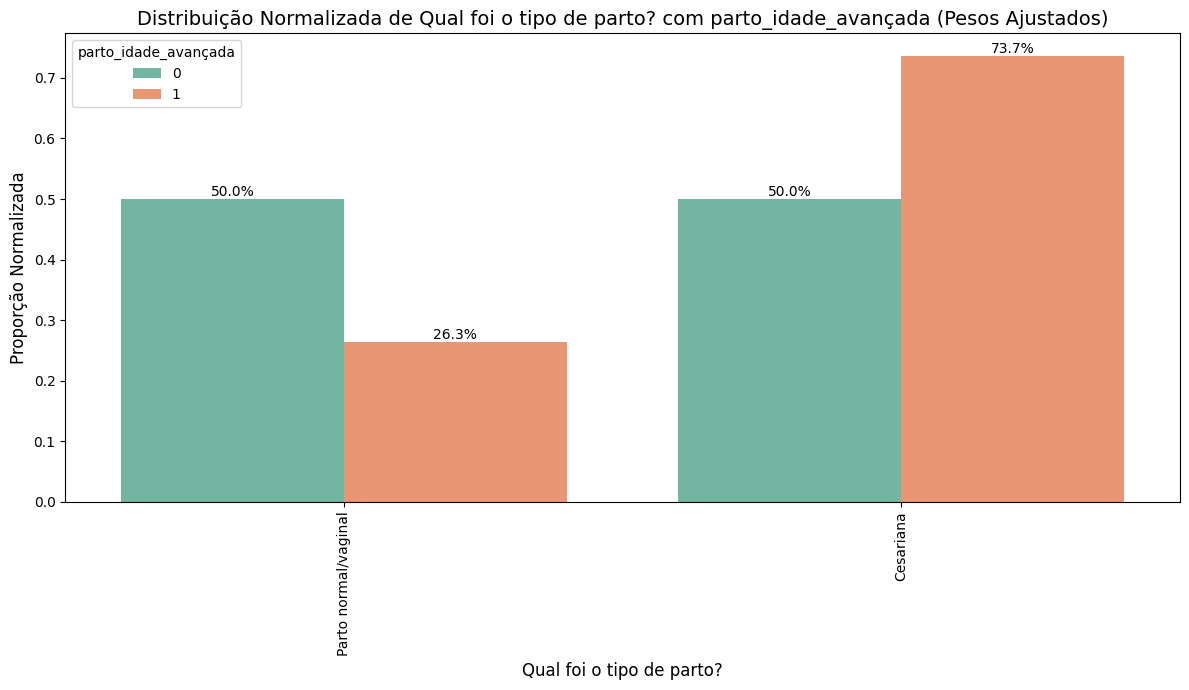

Qui-Quadrado: 98.43227020217964
p-valor: 3.363334931942837e-23
Graus de Liberdade: 1

Tabela de Contingência:


Qual foi o tipo de parto?,Parto normal/vaginal,Cesariana
parto_idade_avançada,,
0,1079.425791,1079.724600
1,145.301448,406.581973



Resultados dos Testes de Proporção (Corrigidos):


,Category,Z_stat,p_value,p_value_corrected,reject_H0_after_correction
0,Parto normal/vaginal,9.969226,2.078428e-23,4.156857e-23,True
1,Cesariana,-9.969226,2.078428e-23,4.156857e-23,True


In [ ]:
df_grupo_maes['Qual foi o tipo de parto?'] = df_grupo_maes['S115'].map({1: 'Parto normal/vaginal', 2: 'Cesariana'}).astype('category')
grafico_teste(df_grupo_maes, x_col='Qual foi o tipo de parto?', hue_col='parto_idade_avançada', cat_order=['Parto normal/vaginal', 'Cesariana'])

### Teve alguma complicação durante o parto?

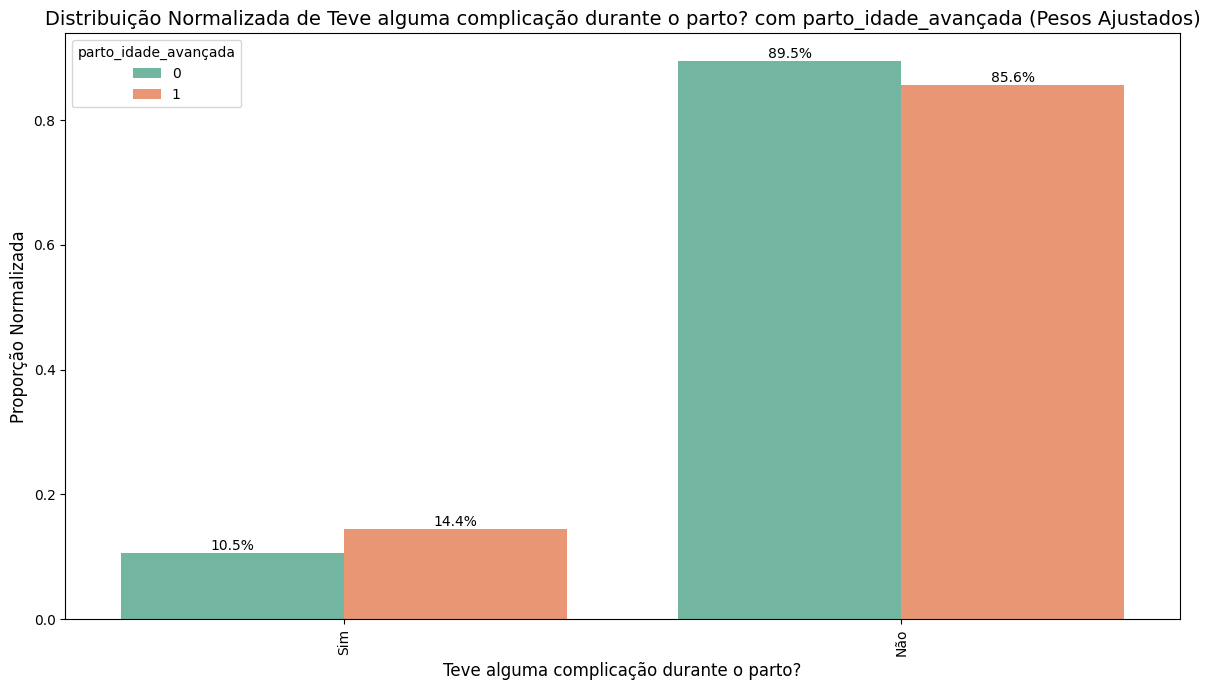

Qui-Quadrado: 6.151562953460789
p-valor: 0.013129601895062121
Graus de Liberdade: 1

Tabela de Contingência:


Teve alguma complicação durante o parto?,Sim,Não
parto_idade_avançada,,
0,227.659170,1931.491221
1,79.512365,472.371056



Resultados dos Testes de Proporção (Corrigidos):


,Category,Z_stat,p_value,p_value_corrected,reject_H0_after_correction
0,Sim,-2.555477,0.010604,0.021208,True
1,Não,2.555477,0.010604,0.021208,True


In [ ]:
df_grupo_maes['Teve alguma complicação durante o parto?'] = df_grupo_maes['S125'].map({1.0: 'Sim', 2.0: 'Não'})
grafico_teste(df_grupo_maes, x_col='Teve alguma complicação durante o parto?', hue_col='parto_idade_avançada', cat_order=['Sim', 'Não'])

### imc_classificacao

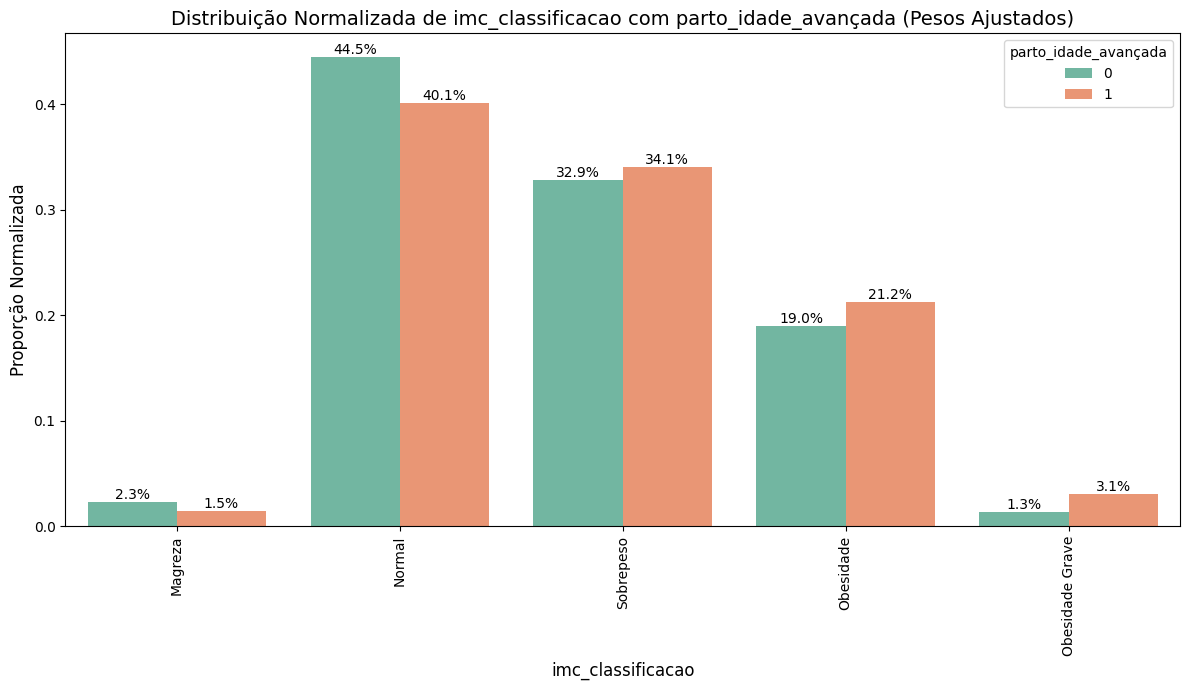

Qui-Quadrado: 35.609001802161984
p-valor: 3.48229305517179e-07
Graus de Liberdade: 4

Tabela de Contingência:


imc_classificacao,Magreza,Normal,Obesidade,Obesidade Grave,Sobrepeso
parto_idade_avançada,,,,,
0,136.903986,2673.888942,1142.155455,79.322944,1973.315298
1,22.294427,612.095929,324.286181,47.118341,520.683154



Resultados dos Testes de Proporção (Corrigidos):


,Category,Z_stat,p_value,p_value_corrected,reject_H0_after_correction
0,Magreza,1.986678,0.046958,0.234790,False
1,Normal,3.112758,0.001853,0.009267,True
2,Obesidade,-1.961138,0.049863,0.249315,False
3,Obesidade Grave,-4.795401,0.000002,0.000008,True
4,Sobrepeso,-0.928197,0.353305,1.000000,False


In [ ]:
grafico_teste(df_grupo_maes, x_col='imc_classificacao', hue_col='parto_idade_avançada', cat_order=['Magreza', 'Normal', 'Sobrepeso', 'Obesidade', 'Obesidade Grave'])

### peso_ao_nascer

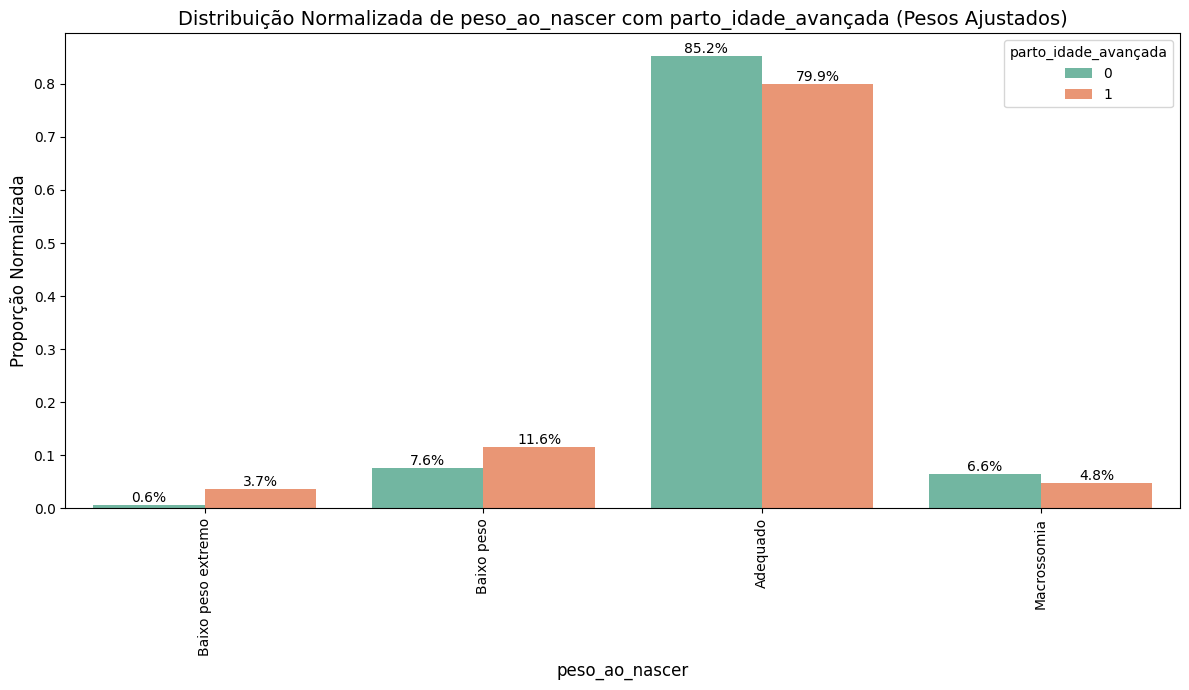

Qui-Quadrado: 43.49250915009199
p-valor: 1.9343311330666135e-09
Graus de Liberdade: 3

Tabela de Contingência:


peso_ao_nascer,Adequado,Baixo peso,Baixo peso extremo,Macrossomia
parto_idade_avançada,,,,
0,1731.437176,153.573222,12.476296,133.586584
1,426.572033,61.808221,19.688737,25.765755



Resultados dos Testes de Proporção (Corrigidos):


,Category,Z_stat,p_value,p_value_corrected,reject_H0_after_correction
0,Adequado,3.005352,2.652733e-03,1.061093e-02,True
1,Baixo peso,-2.977875,2.902545e-03,1.161018e-02,True
2,Baixo peso extremo,-5.679423,1.351497e-08,5.405986e-08,True
3,Macrossomia,1.491085,1.359392e-01,5.437568e-01,False


In [ ]:
grafico_teste(df_grupo_maes, x_col='peso_ao_nascer', hue_col='parto_idade_avançada', cat_order=['Baixo peso extremo','Baixo peso', 'Adequado','Macrossomia'])

### Classificação Idade Gestacional

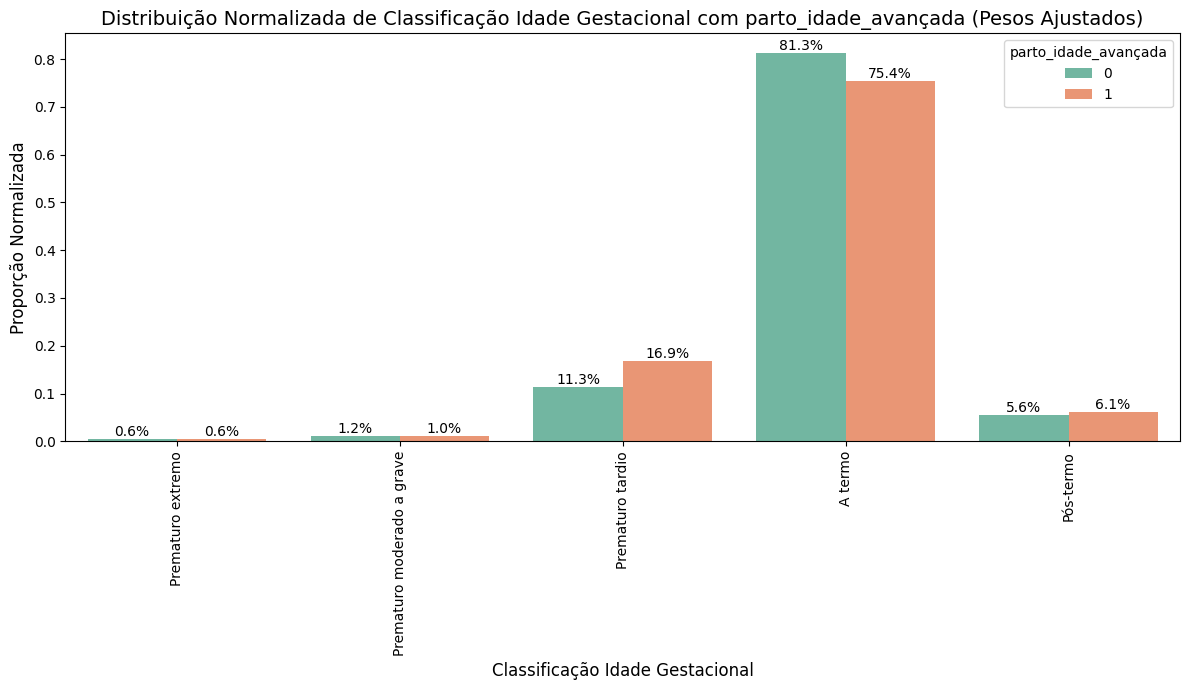

Qui-Quadrado: 12.666949220074903
p-valor: 0.013023170256897946
Graus de Liberdade: 4

Tabela de Contingência:


Classificação Idade Gestacional,A termo,Prematuro extremo,Prematuro moderado a grave,Prematuro tardio,Pós-termo
parto_idade_avançada,,,,,
0,1621.501398,11.847813,23.492578,225.412125,111.926407
1,400.577025,2.982422,5.540327,89.837566,32.606950



Resultados dos Testes de Proporção (Corrigidos):


,Category,Z_stat,p_value,p_value_corrected,reject_H0_after_correction
0,A termo,3.051056,0.002280,0.011402,True
1,Prematuro extremo,0.088574,0.929420,1.000000,False
2,Prematuro moderado a grave,0.260888,0.794179,1.000000,False
3,Prematuro tardio,-3.469665,0.000521,0.002606,True
4,Pós-termo,-0.460159,0.645402,1.000000,False


In [ ]:
grafico_teste(df_grupo_maes, x_col='Classificação Idade Gestacional', hue_col='parto_idade_avançada', cat_order=['Prematuro extremo', 'Prematuro moderado a grave','Prematuro tardio', 'A termo', 'Pós-termo'])

### Risco de Insulto Perinatal

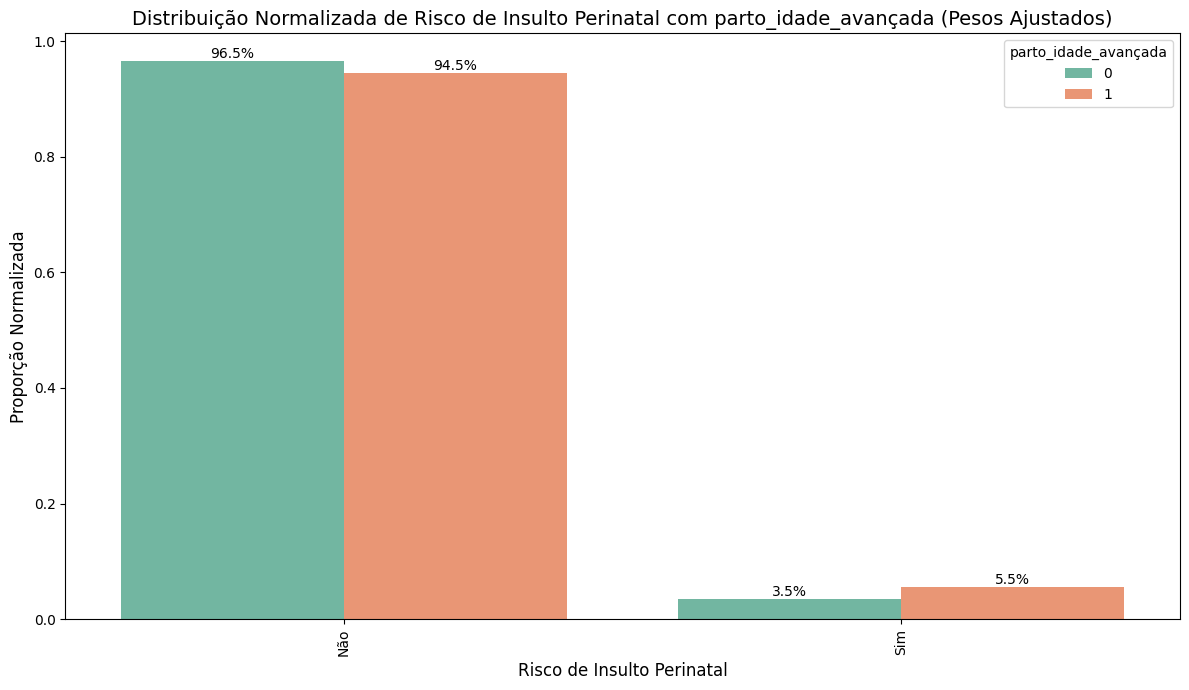

Qui-Quadrado: 13.566624072701739
p-valor: 0.00023024311155447495
Graus de Liberdade: 1

Tabela de Contingência:


Risco de Insulto Perinatal,Não,Sim
parto_idade_avançada,,
0,6093.380690,219.673391
1,1468.597212,86.052049



Resultados dos Testes de Proporção (Corrigidos):


,Category,Z_stat,p_value,p_value_corrected,reject_H0_after_correction
0,Não,3.756542,0.000172,0.000345,True
1,Sim,-3.756542,0.000172,0.000345,True


In [ ]:
grafico_teste(df_grupo_maes, x_col='Risco de Insulto Perinatal', hue_col='parto_idade_avançada', cat_order=['Não', 'Sim'])

### Complicações Perinatais

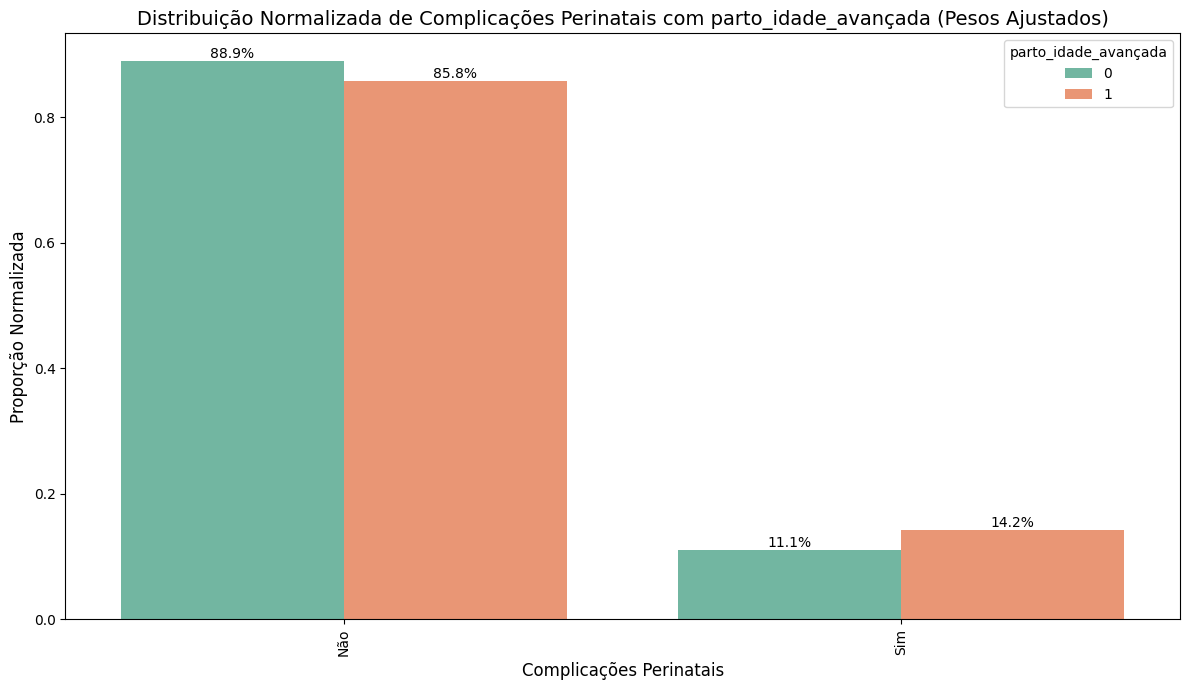

Qui-Quadrado: 11.295765540336383
p-valor: 0.0007768406333218464
Graus de Liberdade: 1

Tabela de Contingência:


Complicações Perinatais,Não,Sim
parto_idade_avançada,,
0,5613.501955,699.552125
1,1334.216718,220.432543



Resultados dos Testes de Proporção (Corrigidos):


,Category,Z_stat,p_value,p_value_corrected,reject_H0_after_correction
0,Não,3.404972,0.000662,0.001323,True
1,Sim,-3.404972,0.000662,0.001323,True


In [ ]:
grafico_teste(df_grupo_maes, x_col='Complicações Perinatais', hue_col='parto_idade_avançada', cat_order=['Não', 'Sim'])

### comorbidade

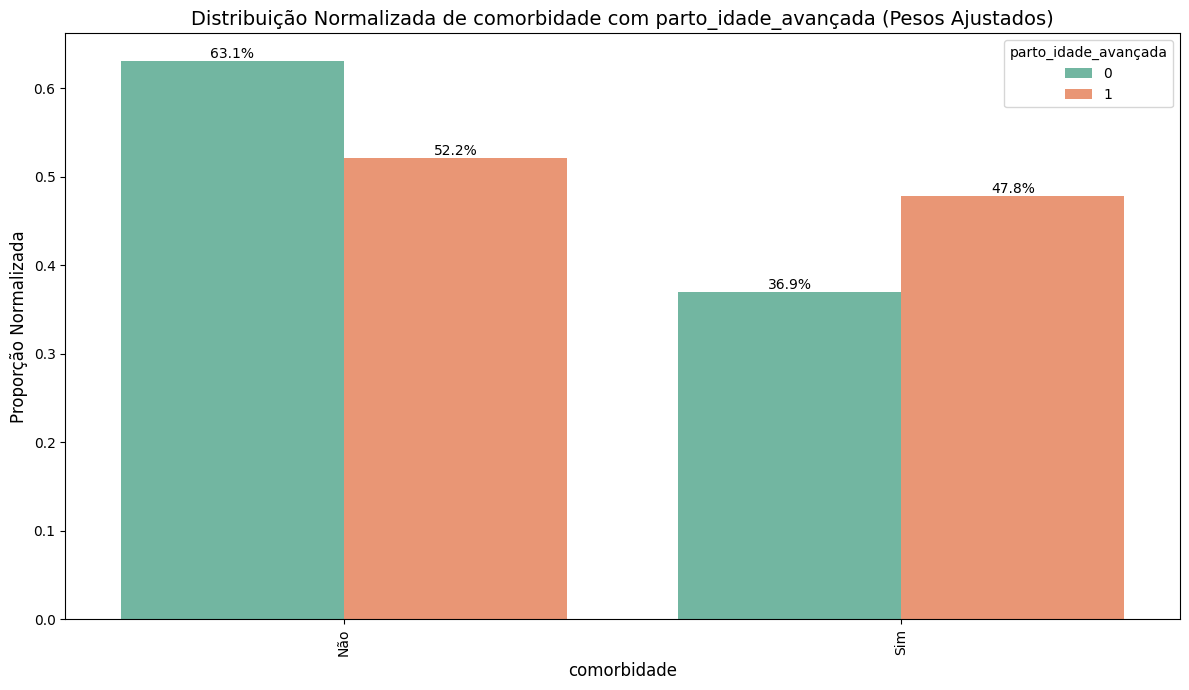

Qui-Quadrado: 61.6186960538425
p-valor: 4.168417938511102e-15
Graus de Liberdade: 1

Tabela de Contingência:


comorbidade,Não,Sim
parto_idade_avançada,,
0,3980.601958,2332.452123
1,811.033473,743.615788



Resultados dos Testes de Proporção (Corrigidos):


,Category,Z_stat,p_value,p_value_corrected,reject_H0_after_correction
0,Não,7.878769,3.306222e-15,6.612445e-15,True
1,Sim,-7.878769,3.306222e-15,6.612445e-15,True


In [ ]:
grafico_teste(df_grupo_maes, x_col='comorbidade', hue_col='parto_idade_avançada', cat_order=['Não', 'Sim'])

## Raça

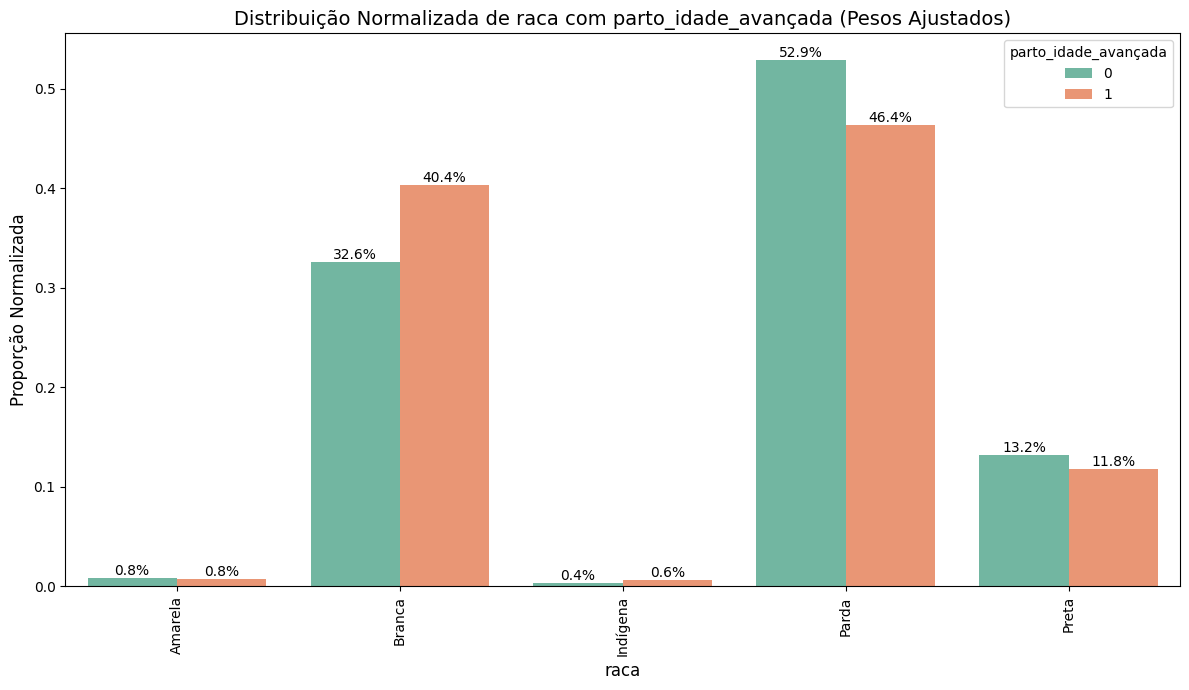

Qui-Quadrado: 35.81450921782293
p-valor: 3.1594145208017763e-07
Graus de Liberdade: 4

Tabela de Contingência:


raca,Amarela,Branca,Indígena,Parda,Preta
parto_idade_avançada,,,,,
0,51.852691,2059.068080,24.790381,3342.432469,834.910459
1,12.072850,627.339823,9.932011,721.709593,183.594984



Resultados dos Testes de Proporção (Corrigidos):


,Category,Z_stat,p_value,p_value_corrected,reject_H0_after_correction
0,Amarela,0.176228,8.601148e-01,1.000000e+00,False
1,Branca,-5.762317,8.296691e-09,4.148345e-08,True
2,Indígena,-1.311699,1.896218e-01,9.481092e-01,False
3,Parda,4.609658,4.033313e-06,2.016656e-05,True
4,Preta,1.489493,1.363577e-01,6.817885e-01,False


In [ ]:
grafico_teste(df_grupo_maes, x_col='raca', hue_col='parto_idade_avançada', cat_order=['Amarela',	'Branca',	'Indígena',	'Parda',	'Preta'])

## Faixa Salarial

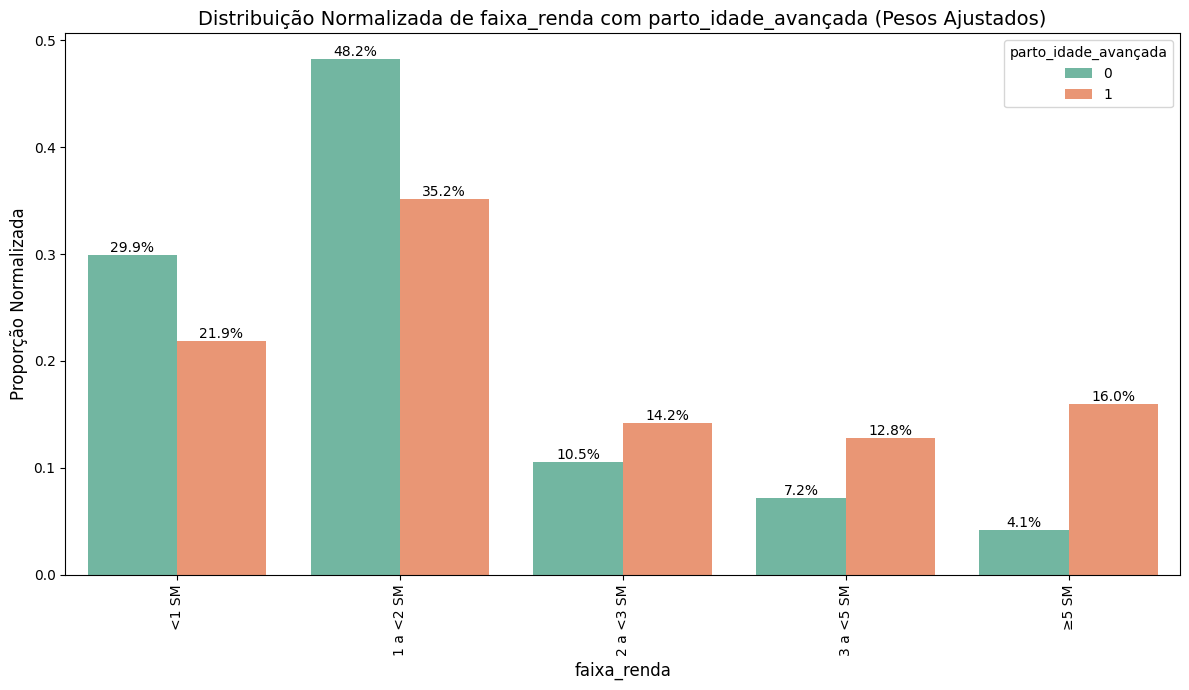

Qui-Quadrado: 234.38128207725384
p-valor: 1.5042996497487863e-49
Graus de Liberdade: 4

Tabela de Contingência:


faixa_renda,1 a <2 SM,2 a <3 SM,3 a <5 SM,<1 SM,≥5 SM
parto_idade_avançada,,,,,
0,1642.219031,358.496325,245.708768,1017.225828,141.271657
1,331.775473,133.642199,120.571898,206.164127,150.706622



Resultados dos Testes de Proporção (Corrigidos):


,Category,Z_stat,p_value,p_value_corrected,reject_H0_after_correction
0,1 a <2 SM,7.118359,1.092193e-12,5.460965e-12,True
1,2 a <3 SM,-3.126504,1.768982e-03,8.844912e-03,True
2,3 a <5 SM,-5.450807,5.014165e-08,2.507082e-07,True
3,<1 SM,4.839971,1.298579e-06,6.492894e-06,True
4,≥5 SM,-12.848825,8.732690e-38,4.366345e-37,True


In [ ]:
grafico_teste(df_grupo_maes, x_col='faixa_renda', hue_col='parto_idade_avançada', cat_order=['<1 SM', '1 a <2 SM', '2 a <3 SM', '3 a <5 SM', '≥5 SM' ])

## Pré Natal

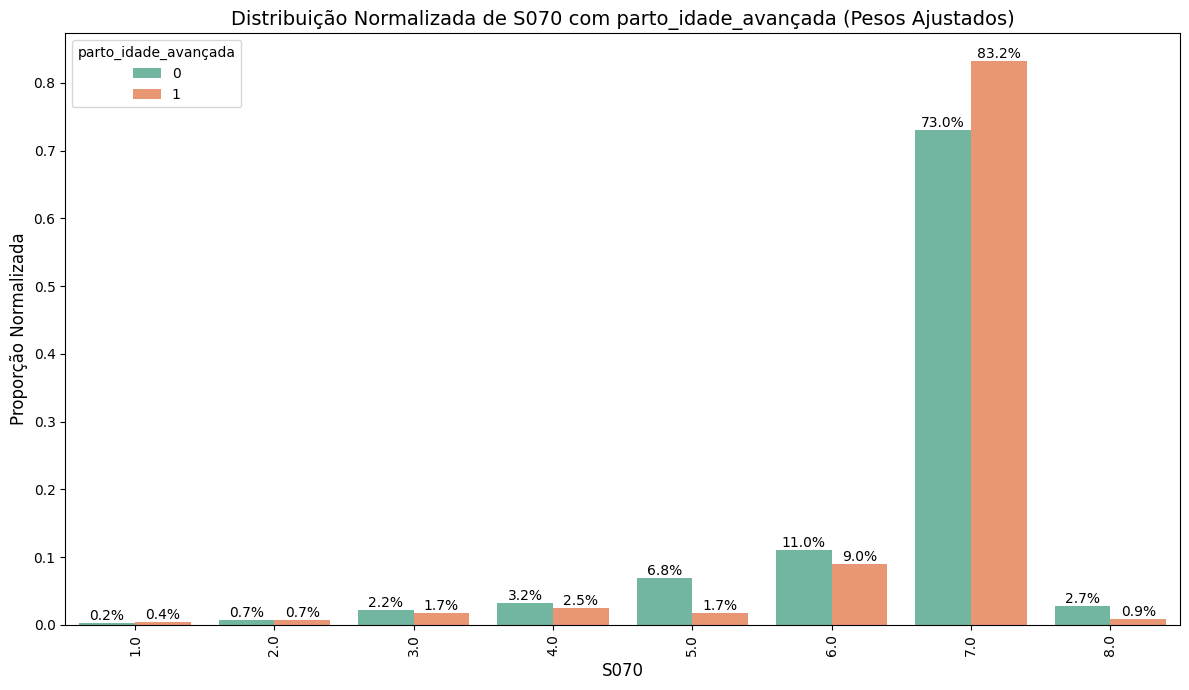

Qui-Quadrado: 35.46512605289918
p-valor: 9.143591655834057e-06
Graus de Liberdade: 7

Tabela de Contingência:


S070,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
parto_idade_avançada,,,,,,,,
0,5.194416,15.455912,45.840292,68.444636,145.049374,233.874977,1548.054845,58.113114
1,2.196409,3.778273,9.107909,13.676744,9.453179,48.970584,453.840462,4.640871



Resultados dos Testes de Proporção (Corrigidos):


,Category,Z_stat,p_value,p_value_corrected,reject_H0_after_correction
0,1.0,-0.623994,0.532631,1.000000,False
1,2.0,0.090148,0.928169,1.000000,False
2,3.0,0.722974,0.469696,1.000000,False
3,4.0,0.870486,0.384035,1.000000,False
4,5.0,4.555173,0.000005,0.000042,True
5,6.0,1.391535,0.164063,1.000000,False
6,7.0,-4.890281,0.000001,0.000008,True
7,8.0,2.597749,0.009384,0.075070,False


In [ ]:
grafico_teste(df_grupo_maes, x_col='S070', hue_col='parto_idade_avançada')

## Idade por Região

In [ ]:
import numpy as np
import pandas as pd

def weighted_mean(x, w):
    """
    Calcula a média ponderada de x usando pesos w.
    """
    return np.sum(w * x) / np.sum(w)

def weighted_std(x, w):
    """
    Calcula o desvio padrão ponderado (amostral) usando a fórmula com correção de Bessel para pesos.
    """
    wm = weighted_mean(x, w)
    # Numerador: soma dos pesos * (x_i - media_ponderada)^2
    num = np.sum(w * (x - wm)**2)

    # Denominador: soma dos pesos - sum(w^2)/sum(w)
    denom = np.sum(w) - (np.sum(w**2) / np.sum(w))

    if denom <= 0:
        # Evita divisão por zero se, por exemplo, houver apenas 1 observação ou todos pesos = 0
        return np.nan

    return np.sqrt(num / denom)


In [ ]:
def weighted_stats(group):
    x = group['idade_ultimo_parto']
    w = group['peso_morador_selec']
    return pd.Series({
        'weighted_mean': weighted_mean(x, w),
        'weighted_std': weighted_std(x, w)
    })

resultado = (
    df_grupo_maes
    .groupby(['regiao_brasileira', 'parto_idade_avançada'])
    .apply(weighted_stats)
    .reset_index()
)


C:\Users\leand\AppData\Local\Temp\ipykernel_16188\3328072865.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['regiao_brasileira', 'parto_idade_avançada'])
C:\Users\leand\AppData\Local\Temp\ipykernel_16188\3328072865.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(weighted_stats)


In [ ]:
resultado[resultado['parto_idade_avançada']==0]

,regiao_brasileira,parto_idade_avançada,weighted_mean,weighted_std
0,Centro-Oeste,0,24.861712,5.129648
2,Nordeste,0,25.346175,5.218514
4,Norte,0,24.479164,4.919460
6,Sudeste,0,26.506646,5.018562
8,Sul,0,26.763914,4.999889


In [ ]:
resultado[resultado['parto_idade_avançada']==1]

,regiao_brasileira,parto_idade_avançada,weighted_mean,weighted_std
1,Centro-Oeste,1,37.786968,2.621871
3,Nordeste,1,37.908168,2.771455
5,Norte,1,38.041249,2.791217
7,Sudeste,1,38.029897,2.677493
9,Sul,1,37.593760,2.743557


# Correlação

In [ ]:
df_corr = df_grupo_maes[['idade_ultimo_parto', 'peso_ao_nascer', 'Risco de Insulto Perinatal', 'Complicações Perinatais', 'comorbidade', 'faixa_renda']].copy()

df_corr['peso_ao_nascer'] = df_corr['peso_ao_nascer'].map({'Adequado':2, 'Baixo peso':1, 'Macrossomia':3, 'Baixo peso extremo':0})
df_corr['faixa_renda'] = df_corr['faixa_renda'].map({ '<1 SM':0 , '1 a <2 SM':1, '2 a <3 SM':2, '3 a <5 SM':3 , '≥5 SM':4})

for col in ['Risco de Insulto Perinatal', 'Complicações Perinatais', 'comorbidade']:
    df_corr[col] = df_corr[col].map({'Sim':1, 'Não':0})
df_corr

,idade_ultimo_parto,peso_ao_nascer,Risco de Insulto Perinatal,Complicações Perinatais,comorbidade,faixa_renda
0,28.0,2,0,0,0,NaN
1,33.0,2,1,1,1,4
2,24.0,NaN,0,0,0,NaN
3,22.0,NaN,0,0,0,NaN
4,23.0,NaN,0,0,0,NaN
...,...,...,...,...,...,...
7838,29.0,NaN,0,0,0,1
7839,24.0,NaN,0,0,0,1
7840,21.0,NaN,0,0,0,NaN
7841,25.0,1,0,0,0,NaN


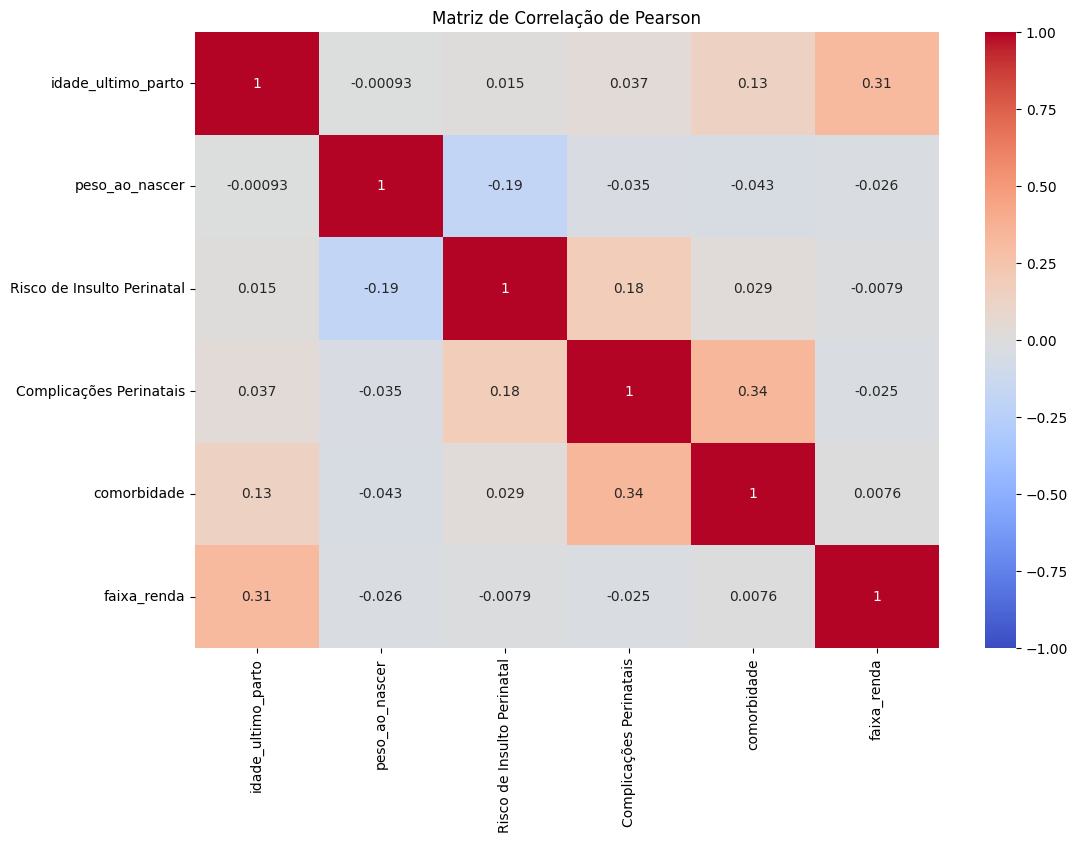

In [ ]:
# Calcular a matriz de correlação de Pearson
correlation_matrix = df_corr.corr(method='pearson')

# Plotar a matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Matriz de Correlação de Pearson')
plt.show()

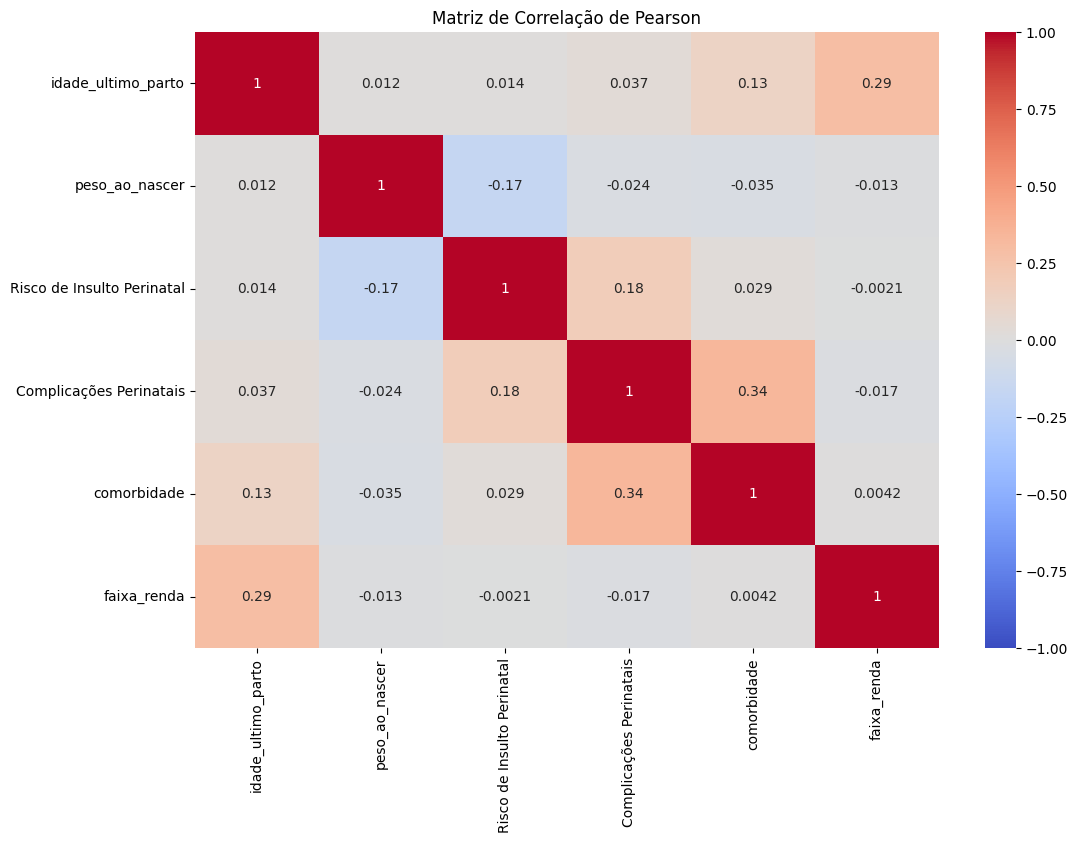

In [ ]:
# Calcular a matriz de correlação de Pearson
correlation_matrix = df_corr.corr(method='spearman')

# Plotar a matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Matriz de Correlação de Pearson')
plt.show()

# Quais comorbidades aumenta os fatores de riscos

In [ ]:
cols = ['Q00201',
        'Q03001',
        'Q11604',
        'Q11006',
        'Q092',
        'Q120',
        'T004',
        'Q055012',
        'Q06306',
          'Q060',
          'Q124',
          'Q128',
          'fumante_atual']

cols_rename = ['pressão alta',
        'diabetes',
        'Doença Pulmonar Obstrutiva Crônica',
        'ansiedade, esquizofrenia, bipolar, psicose, TOC',
        'depressão',
        'câncer',
        'doença/infecção sexualmente transmissível',
        'Infarto ou AVC ',
        'doença do coração, infarto, angina, insuficiência cardíaca',
        'colesterol alto',
        'insuficiência renal crônica',
        'doença crônica (física ou mental)',
        'fumante_atual']

df_grupo_maes[cols_rename] = df_grupo_maes[cols]
for col in cols_rename:
    df_grupo_maes[col] = np.where(df_grupo_maes[col]==1, 1, 0)

In [ ]:
df_com = df_grupo_maes[df_grupo_maes['comorbidade']=='Sim'].copy()
print(f'pessoas com comorbidades: {len(df_com)}\n')
for col in cols_rename:
    print(f"{df_com[col].sum()}\t {col}")

pessoas com comorbidades: 2954

950	 pressão alta
241	 diabetes
60	 Doença Pulmonar Obstrutiva Crônica
491	 ansiedade, esquizofrenia, bipolar, psicose, TOC
735	 depressão
51	 câncer
77	 doença/infecção sexualmente transmissível
3	 Infarto ou AVC 
140	 doença do coração, infarto, angina, insuficiência cardíaca
481	 colesterol alto
59	 insuficiência renal crônica
502	 doença crônica (física ou mental)
582	 fumante_atual


In [ ]:
df_com = df_grupo_maes[df_grupo_maes['comorbidade_score']==1].copy()
print(f'pessoas com comorbidades: {len(df_com)}\n')
for col in cols_rename:
    print(f"{df_com[col].sum()}\t {col}")

pessoas com comorbidades: 1965

487	 pressão alta
94	 diabetes
26	 Doença Pulmonar Obstrutiva Crônica
147	 ansiedade, esquizofrenia, bipolar, psicose, TOC
257	 depressão
24	 câncer
31	 doença/infecção sexualmente transmissível
0	 Infarto ou AVC 
45	 doença do coração, infarto, angina, insuficiência cardíaca
226	 colesterol alto
22	 insuficiência renal crônica
262	 doença crônica (física ou mental)
344	 fumante_atual


In [ ]:
df_grupo_maes = pd.get_dummies(df_grupo_maes, columns=['Classificação Idade Gestacional'], prefix='Classificação Idade Gestacional', drop_first=False,dtype=int)
cols_idade_gestacional = ['Classificação Idade Gestacional_A termo',
       'Classificação Idade Gestacional_Prematuro extremo',
       'Classificação Idade Gestacional_Prematuro moderado a grave',
       'Classificação Idade Gestacional_Prematuro tardio',
       'Classificação Idade Gestacional_Pós-termo']

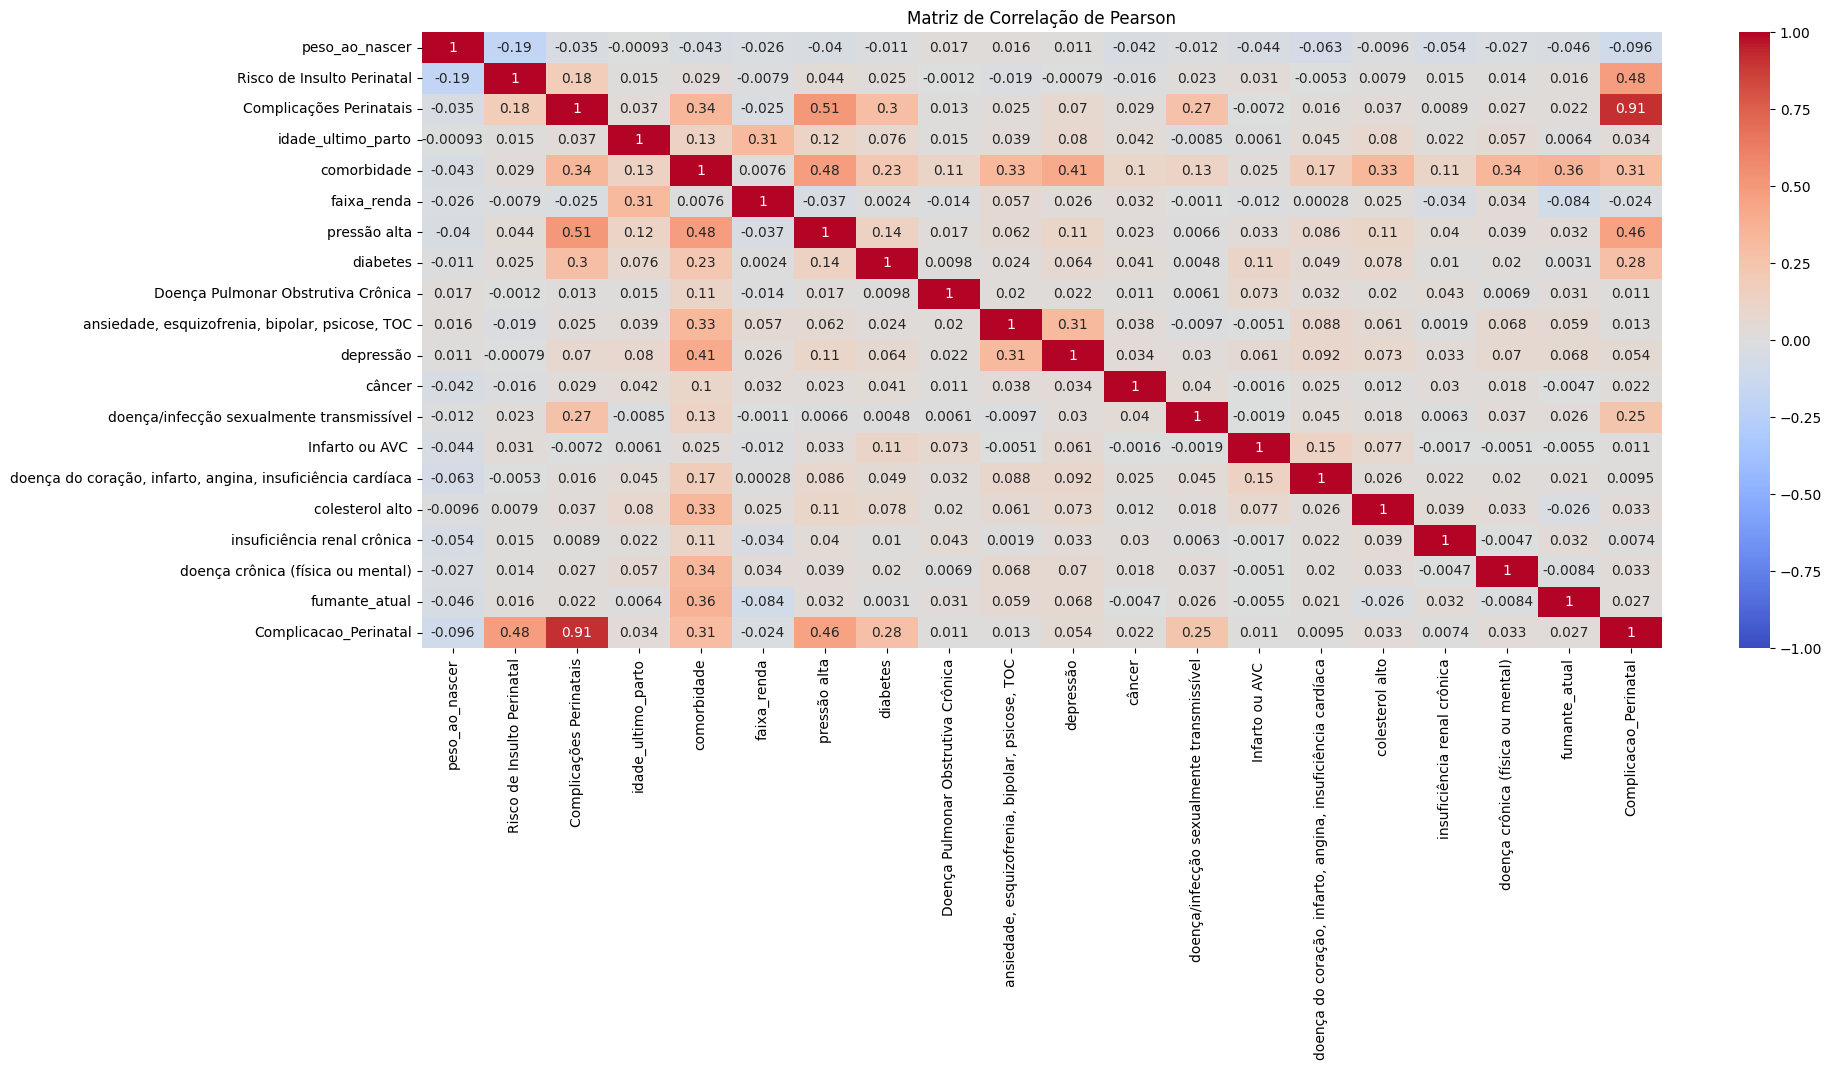

In [ ]:
df_corr = df_grupo_maes[['peso_ao_nascer', 'Risco de Insulto Perinatal', 'Complicações Perinatais', 'idade_ultimo_parto', 'comorbidade', 'faixa_renda']+cols_rename].copy()

df_corr['peso_ao_nascer'] = df_corr['peso_ao_nascer'].map({'Adequado':2, 'Baixo peso':1, 'Macrossomia':3, 'Baixo peso extremo':0})
df_corr['faixa_renda'] = df_corr['faixa_renda'].map({ '<1 SM':0 , '1 a <2 SM':1, '2 a <3 SM':2, '3 a <5 SM':3 , '≥5 SM':4})

for col in ['Risco de Insulto Perinatal', 'Complicações Perinatais', 'comorbidade']:
    df_corr[col] = df_corr[col].map({'Sim':1, 'Não':0})

df_corr['Complicacao_Perinatal'] = np.where(((df_corr['Risco de Insulto Perinatal'].astype(int)==1) | (df_corr['Complicações Perinatais'].astype(int)==1)), 1, 0)
# Calcular a matriz de correlação de Pearson
correlation_matrix = df_corr.corr(method='pearson')

# Plotar a matriz de correlação
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Matriz de Correlação de Pearson')
plt.show()

In [ ]:
np.where(((df_corr['Risco de Insulto Perinatal'].astype(int)==1) | (df_corr['Complicações Perinatais'].astype(int)==1)), 1, 0)

array([0, 1, 0, ..., 0, 0, 0], shape=(7843,))

# Crianças

In [95]:

def plot_with_hue_normalized(df, x_col, hue_col):
    """
    Plota gráficos com base no tipo de dado da coluna `x_col` e inclui uma coluna `hue_col`.
    Os dados são normalizados dentro de cada categoria de `hue` para lidar com desbalanceamento.
    Exibe as porcentagens relativas em cima de cada barra para variáveis categóricas.
    Para variáveis numéricas, exibe histogramas normalizados.

    :param df: DataFrame contendo os dados.
    :param x_col: Nome da coluna a ser usada no eixo X.
    :param hue_col: Nome da coluna a ser usada como hue.
    """
    if x_col not in df.columns or hue_col not in df.columns:
        raise ValueError(f"As colunas {x_col} ou {hue_col} não estão presentes no DataFrame.")

    # Verificar se a coluna tem apenas NaN
    if df[x_col].dropna().empty:
        print(f"A coluna {x_col} não possui dados válidos (apenas NaN). Gráfico não será gerado.")
        return

    # Verificar se a coluna é numérica ou categórica
    if pd.api.types.is_numeric_dtype(df[x_col]):
        # Normalizar os dados para variáveis numéricas
        normalized_df = (
            df[[x_col, hue_col]]
            .dropna()
            .groupby([hue_col, pd.cut(df[x_col], bins=10)])  # Agrupar por faixas numéricas
            .size()
            .reset_index(name="count")
        )

        # Normalizar por proporção dentro de cada grupo de hue_col
        normalized_df['proportion'] = normalized_df.groupby(hue_col)['count'].transform(lambda x: x / x.sum())

        # Gráfico para variáveis numéricas
        plt.figure(figsize=(12, 7))
        sns.barplot(data=normalized_df, x=x_col, y="proportion", hue=hue_col, palette="Set2")

        plt.title(f"Distribuição Normalizada de {x_col} com {hue_col}", fontsize=14)
        plt.xlabel(x_col, fontsize=12)
        plt.ylabel("Proporção", fontsize=12)
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

    elif isinstance(df[x_col].dtype, pd.CategoricalDtype) or df[x_col].dtype == 'object':
        # Normalizar os dados para variáveis categóricas
        normalized_df = (
            df[[x_col, hue_col]]
            .dropna()
            .groupby([hue_col, x_col], observed=False)
            .size()
            .reset_index(name="count")
        )

        # Normalizar por proporção dentro de cada grupo de hue_col
        normalized_df['proportion'] = normalized_df.groupby(hue_col, observed=False)['count'].transform(lambda x: x / x.sum())

        # Gráfico para variáveis categóricas
        plt.figure(figsize=(12, 7))
        ax = sns.barplot(data=normalized_df, x=x_col, y="proportion", hue=hue_col, palette="Set2")

        # Adicionar porcentagem acima de cada barra
        for container in ax.containers:
            ax.bar_label(
                container,
                labels=[f"{v.get_height() * 100:.1f}%" for v in container],
                label_type="edge",
                fontsize=10
            )

        # Configurações do gráfico
        plt.title(f"Distribuição Normalizada de {x_col} com {hue_col}", fontsize=14)
        plt.xlabel(x_col, fontsize=12)
        plt.ylabel("Proporção", fontsize=12)
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()
    else:
        raise ValueError(f"O tipo de dado da coluna {x_col} não é suportado para este gráfico.")


In [96]:
df_grupo_criancas.columns

Index(['V0001', 'V0024', 'UPA_PNS', 'V0006_PNS', 'V0015', 'V0022', 'V0026',
       'V0031', 'V0025A', 'V0025B',
       ...
       'L040_bin', 'num_vacinas', 'cobertura_completa', 'L037_status',
       'L038_status', 'L039_status', 'L040_status', 'estado_vacinal',
       'idade_ultimo_parto', 'parto_idade_avançada'],
      dtype='object', length=222)

In [122]:
df_grupo_criancas['idade'] = df_grupo_criancas['idade'].astype(int)
df_maior = df_grupo_criancas[df_grupo_criancas.idade>=2].copy()
df_menor = df_grupo_criancas[df_grupo_criancas.idade<2].copy()
df_menor.shape, df_maior.shape,df_grupo_criancas.shape

((2538, 222), (5305, 222), (7843, 222))

## Crianças Menores

In [ ]:
# O que me interessa delas?
# # Módulo L - Crianças com menos de dois anos
"L019", #Suplemento de ferro 1 sim


"L033",  # O teste do coraçãozinho realizado deu resultado alterado?
# Cobertura Vacianl
# "L037",  # Vacina Penta (também chamada de Pentavalente, DTP/Hib/HB)
# "L038",  # Vacina Poliomielite (também chamada de gotinha, VIP, VOP, PÓLIO, ANTIPÓLIO, POLIOMIELITE, SABIN)
# "L039",  # Vacina Pneumocócica (também chamada de Pneumo 10, Pneumo 13, Pncc)
# "L040",  # Vacina Tríplice Viral (também chamada SCR, TRIVIRAL, TV, MMR).
# "L01701",  # Leite materno?
"L018",  # Desde que ___________nasceu, tomou ou comeu outro alimento que não leite materno?


# Adicionar
'J00402' # Algum motivo de saude impediu de realizar atividades habituais?

# Incluir - Consultas médicas
'J001' # estadod e saude
'J007' # doença cronica
'J01101' # Quantidad ed eonsultas medicas nos ultimos 12 meses

"regiao_brasileira"

In [124]:
df_menor['estado_vacinal'] = df_menor['estado_vacinal'].map({True:'Adequado', False:'Não Adequado'})

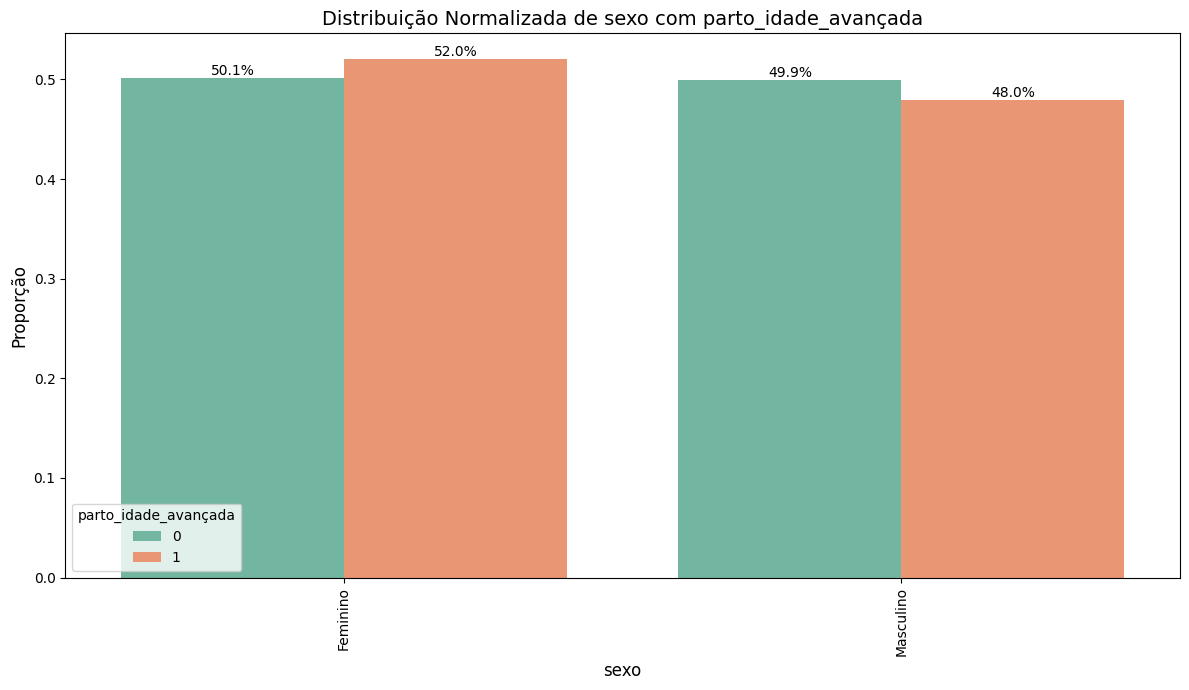

In [100]:
plot_with_hue_normalized(df_menor, 'sexo', 'parto_idade_avançada')

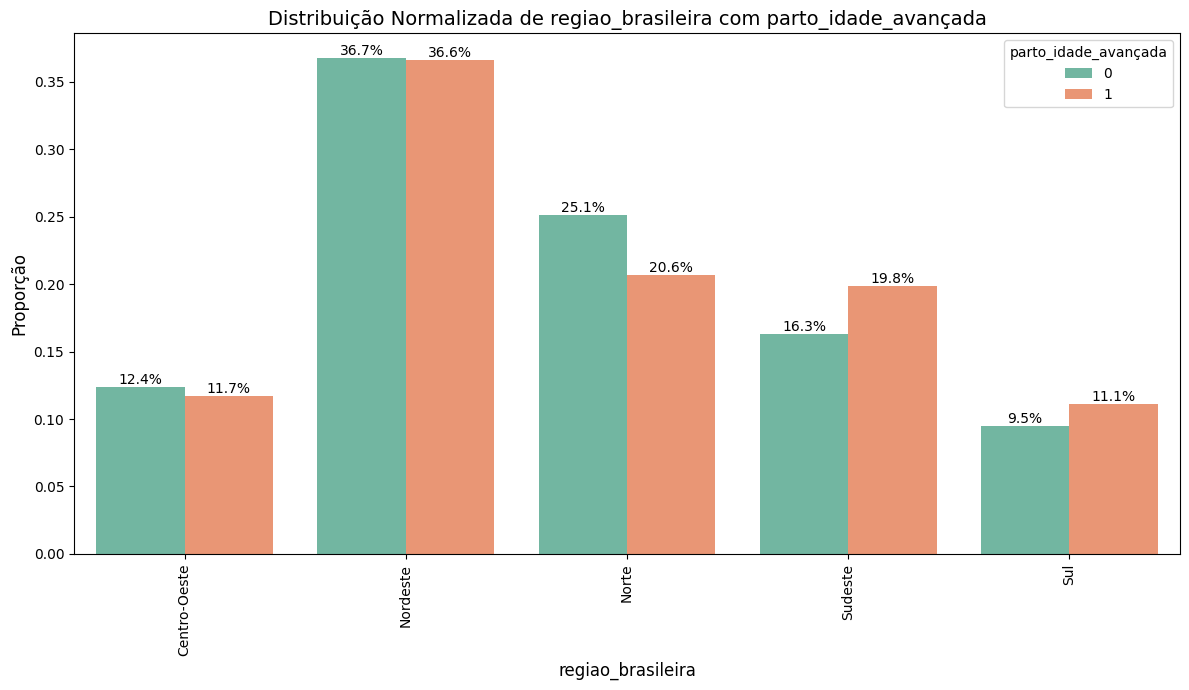

In [102]:
plot_with_hue_normalized(df_menor, 'regiao_brasileira', 'parto_idade_avançada')

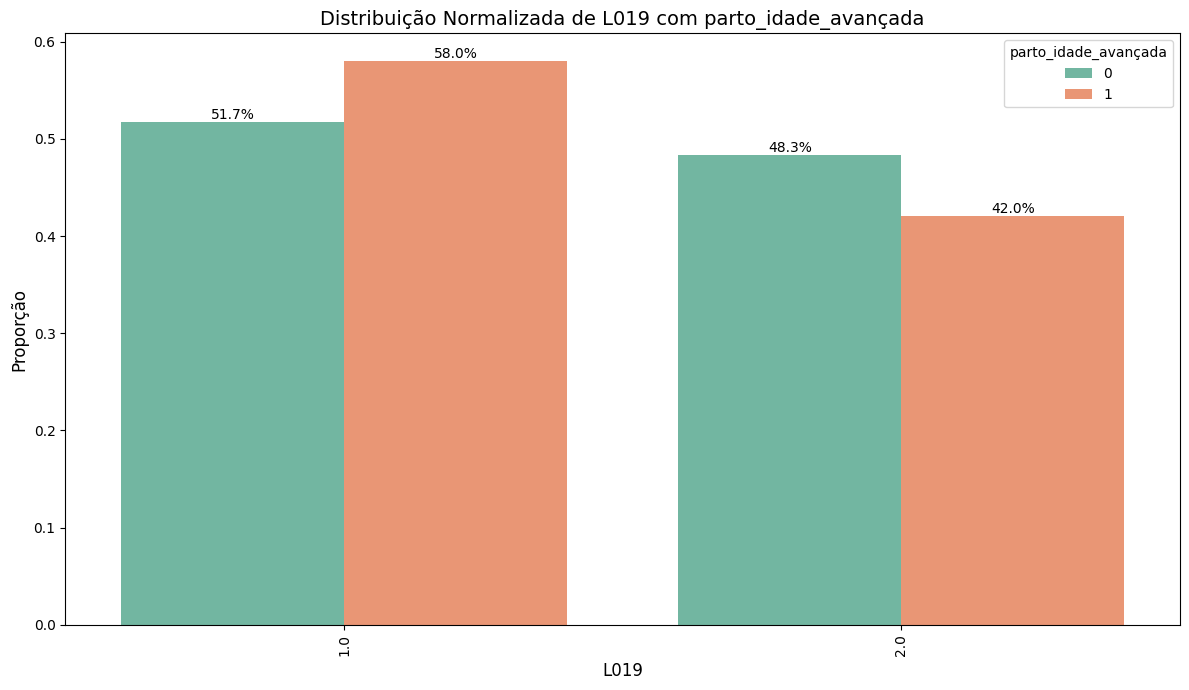

In [ ]:
plot_with_hue_normalized(df_menor, 'L019', 'parto_idade_avançada') # Suplemento ferroso 1 -Sim,  2 Não

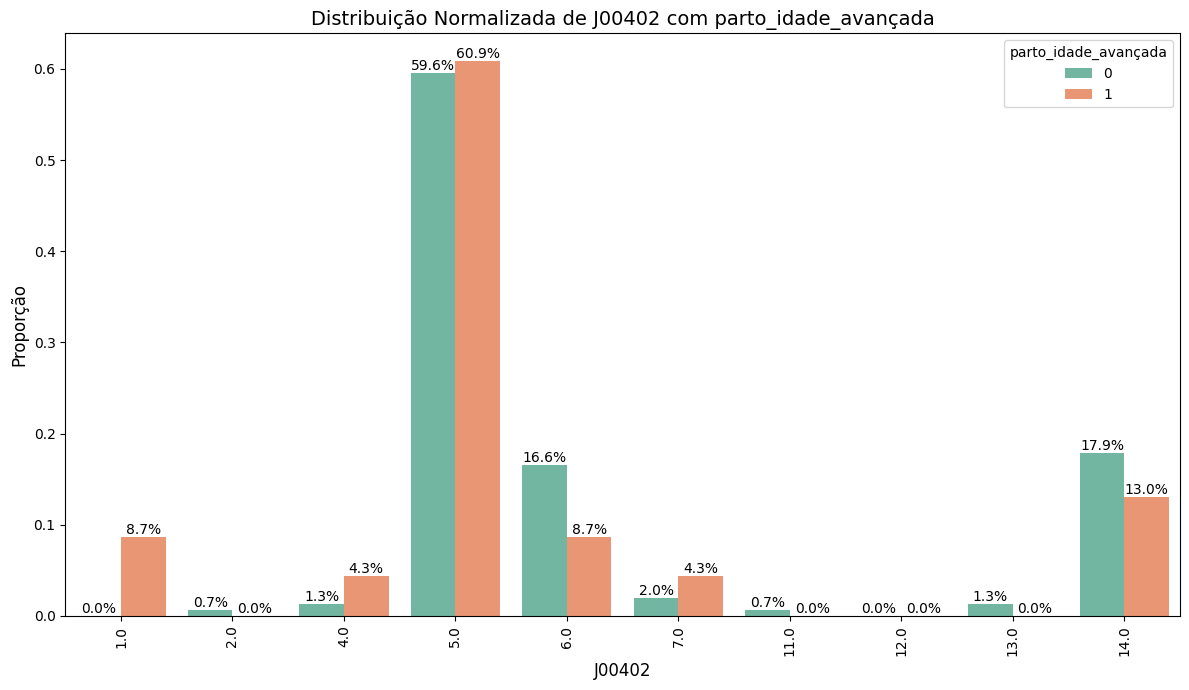

In [108]:
plot_with_hue_normalized(df_menor, 'J00402', 'parto_idade_avançada')# Algum motivo de saude impediu de realizar atividades habituais?

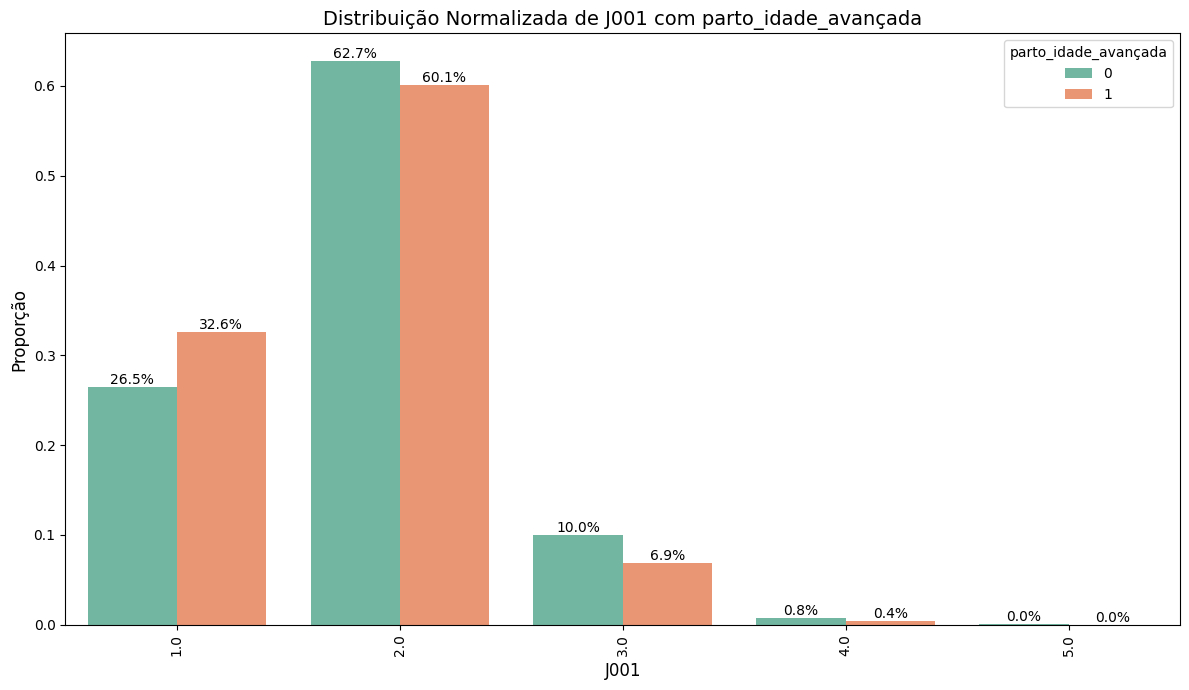

In [112]:
plot_with_hue_normalized(df_menor, 'J001', 'parto_idade_avançada')# estadod e saude

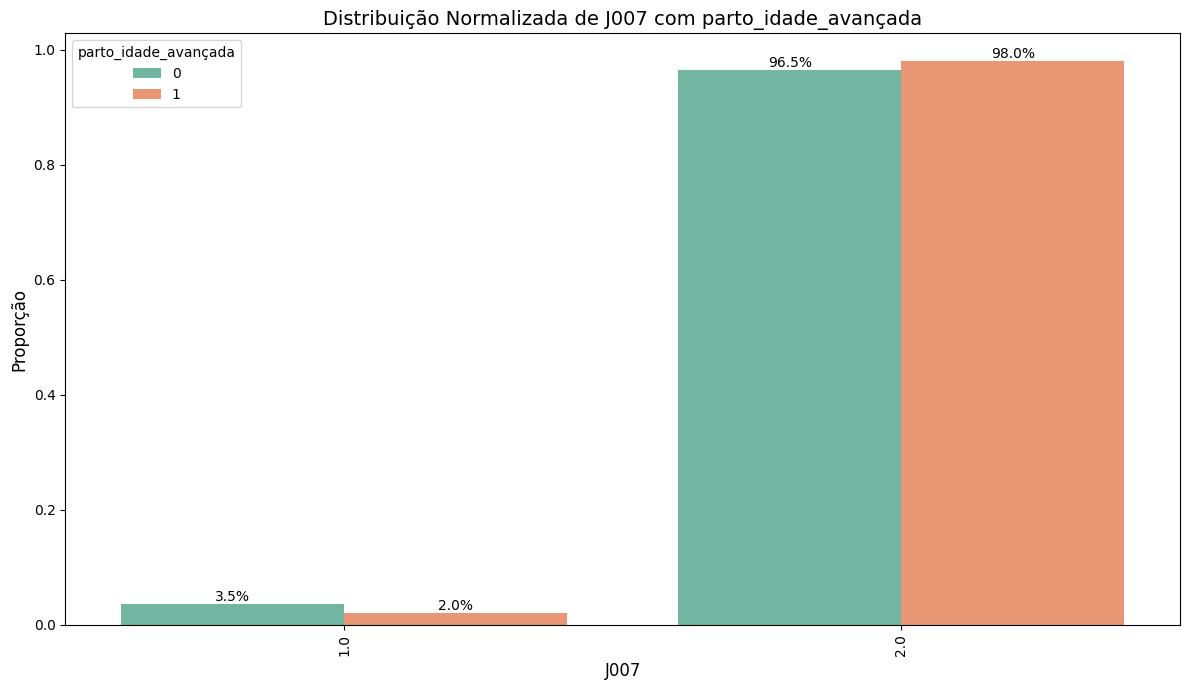

In [113]:
plot_with_hue_normalized(df_menor, 'J007', 'parto_idade_avançada')# doença cronica

C:\Users\leand\AppData\Local\Temp\ipykernel_18220\4151625972.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby([hue_col, pd.cut(df[x_col], bins=10)])  # Agrupar por faixas numéricas
C:\Users\leand\AppData\Local\Temp\ipykernel_18220\4151625972.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  normalized_df['proportion'] = normalized_df.groupby(hue_col)['count'].transform(lambda x: x / x.sum())


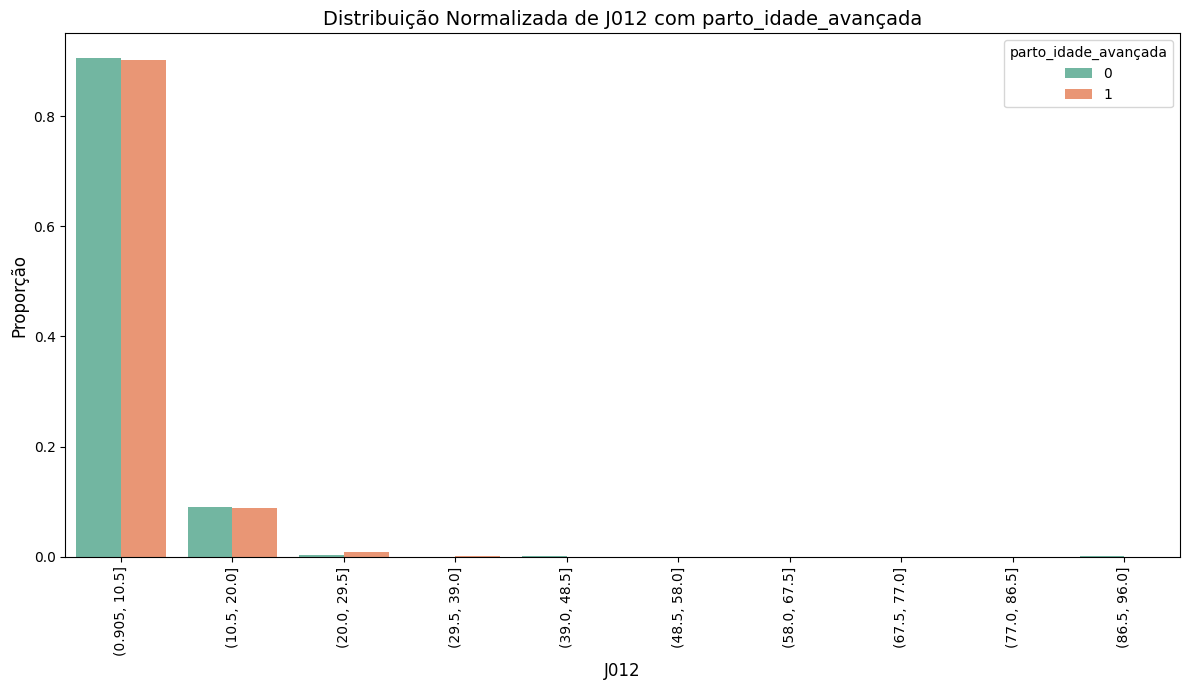

In [115]:
plot_with_hue_normalized(df_menor, 'J012', 'parto_idade_avançada') # Quantidad ed eonsultas medicas nos ultimos 12 meses

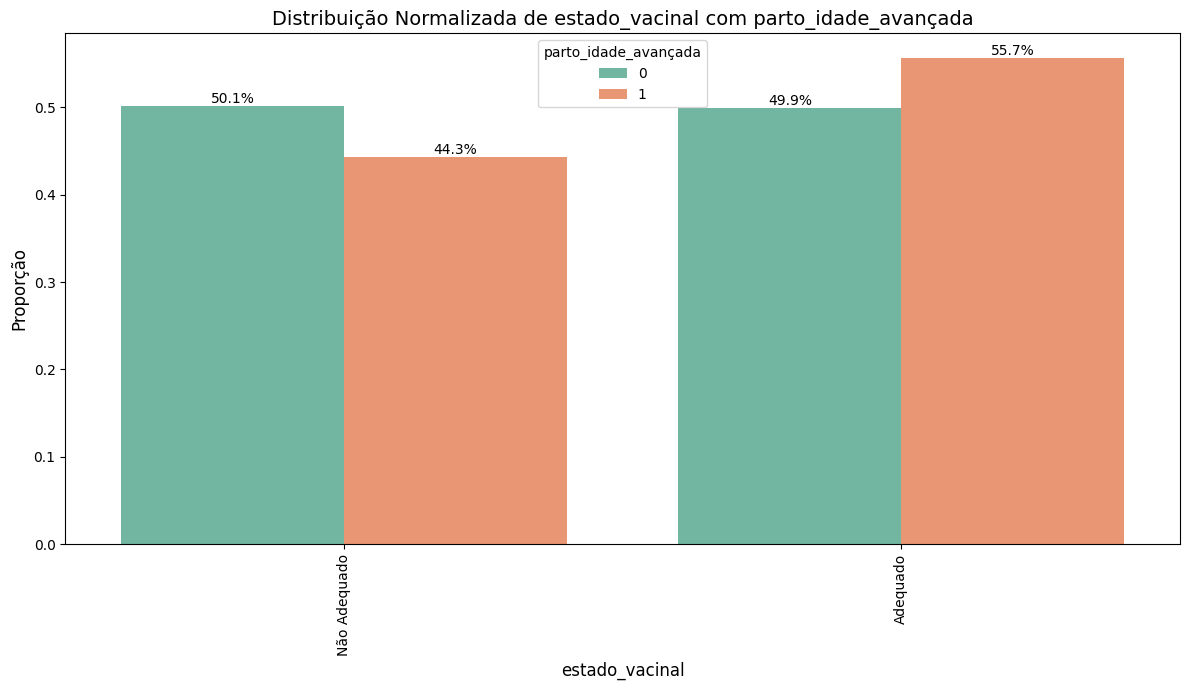

In [125]:
plot_with_hue_normalized(df_menor, 'estado_vacinal', 'parto_idade_avançada')

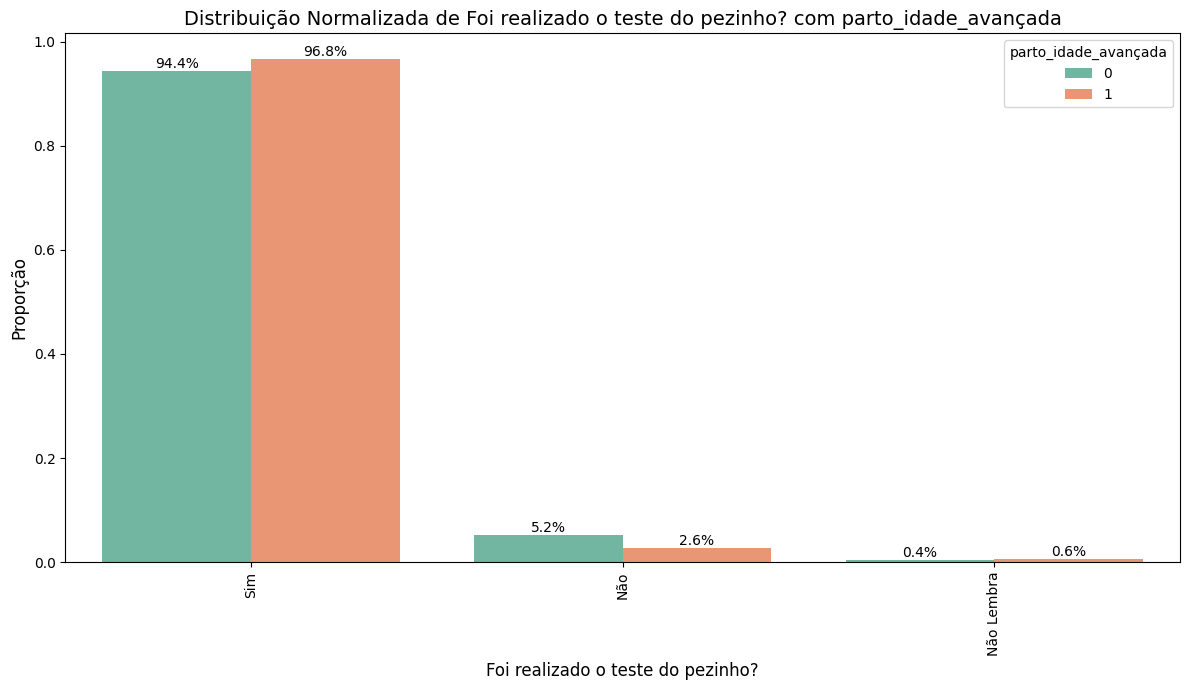

In [ ]:
df_menor['Foi realizado o teste do pezinho?'] = df_menor['L021'].map({1.0: 'Sim', 2.0: 'Não', 3.0: 'Não Lembra'})
plot_with_hue_normalized(df_menor, 'Foi realizado o teste do pezinho?', 'parto_idade_avançada')

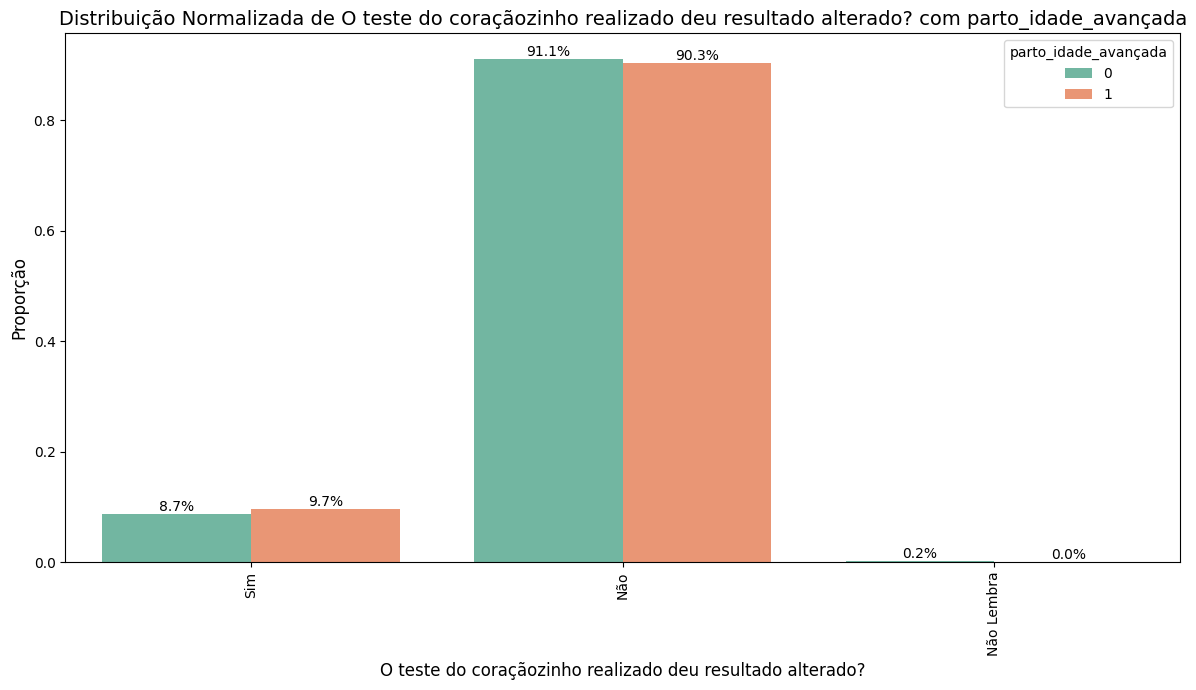

In [126]:
df_menor['O teste do coraçãozinho realizado deu resultado alterado?'] = df_menor['L033'].map({1.0: 'Sim', 2.0: 'Não', 3.0: 'Não Lembra'})
plot_with_hue_normalized(df_menor, 'O teste do coraçãozinho realizado deu resultado alterado?', 'parto_idade_avançada')

## Crianças Maiores

In [129]:
df_maior['deficiencia'].value_counts(dropna=False, normalize=True)

deficiencia
0    0.939303
1    0.060697
Name: proportion, dtype: float64

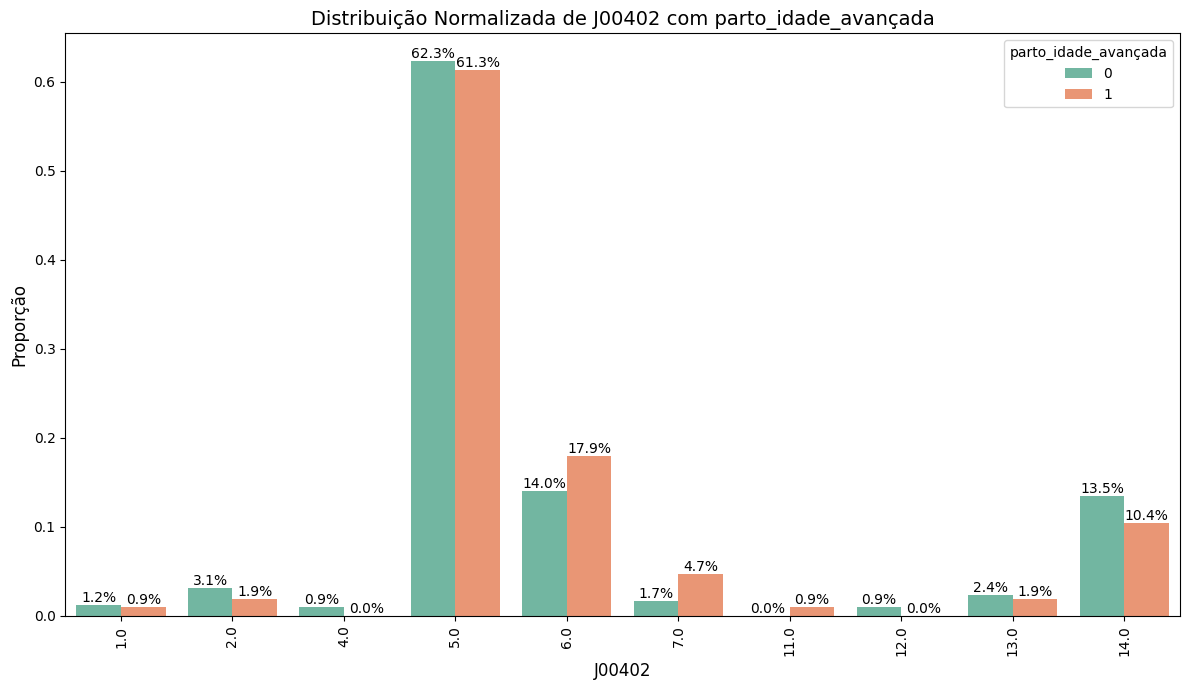

In [142]:
plot_with_hue_normalized(df_maior, 'J00402', 'parto_idade_avançada')

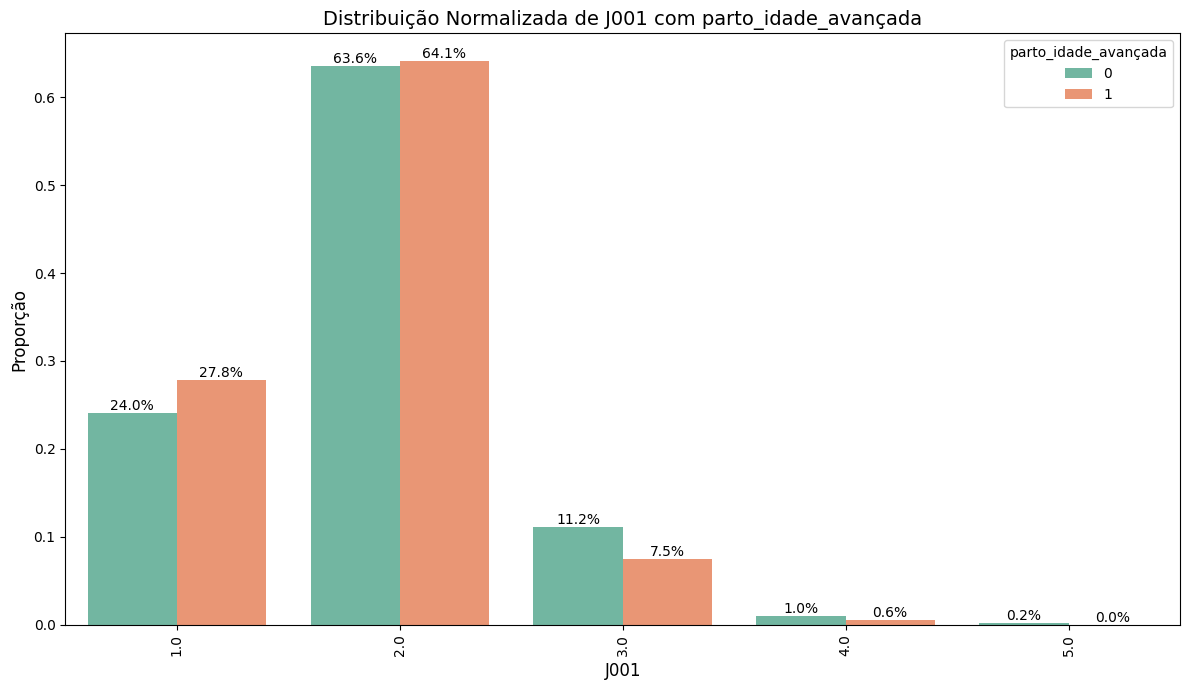

In [ ]:
plot_with_hue_normalized(df_maior, 'J001', 'parto_idade_avançada') # Estado de saude

In [147]:
df_maior['deficiencia'].value_counts(dropna=False)

deficiencia
0    4983
1     322
Name: count, dtype: int64

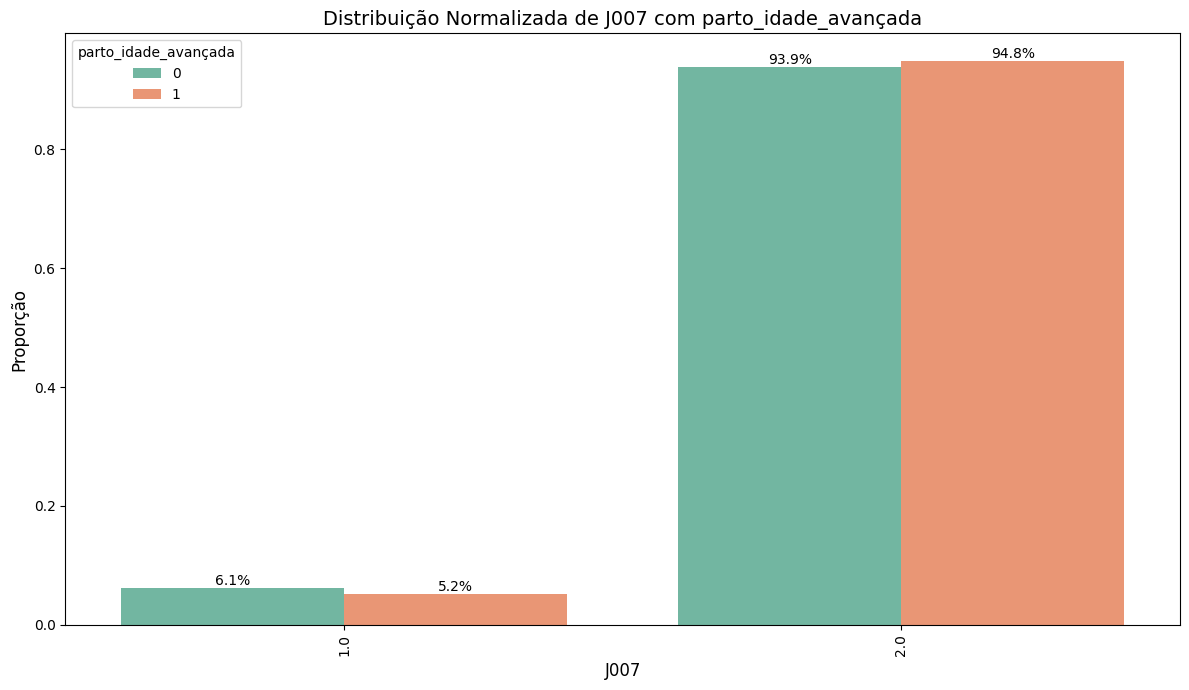

In [144]:
plot_with_hue_normalized(df_maior, 'J007', 'parto_idade_avançada')

In [151]:
df_maior['J012'].value_counts(dropna=False)

J012
1.0     1045
2.0      990
NaN      766
3.0      754
4.0      518
5.0      408
6.0      255
10.0     218
12.0     117
8.0       97
7.0       59
15.0      20
20.0      20
9.0       14
30.0       4
14.0       4
24.0       4
36.0       3
11.0       2
96.0       1
25.0       1
18.0       1
48.0       1
40.0       1
60.0       1
16.0       1
Name: count, dtype: int64

C:\Users\leand\AppData\Local\Temp\ipykernel_18220\4151625972.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby([hue_col, pd.cut(df[x_col], bins=10)])  # Agrupar por faixas numéricas
C:\Users\leand\AppData\Local\Temp\ipykernel_18220\4151625972.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  normalized_df['proportion'] = normalized_df.groupby(hue_col)['count'].transform(lambda x: x / x.sum())


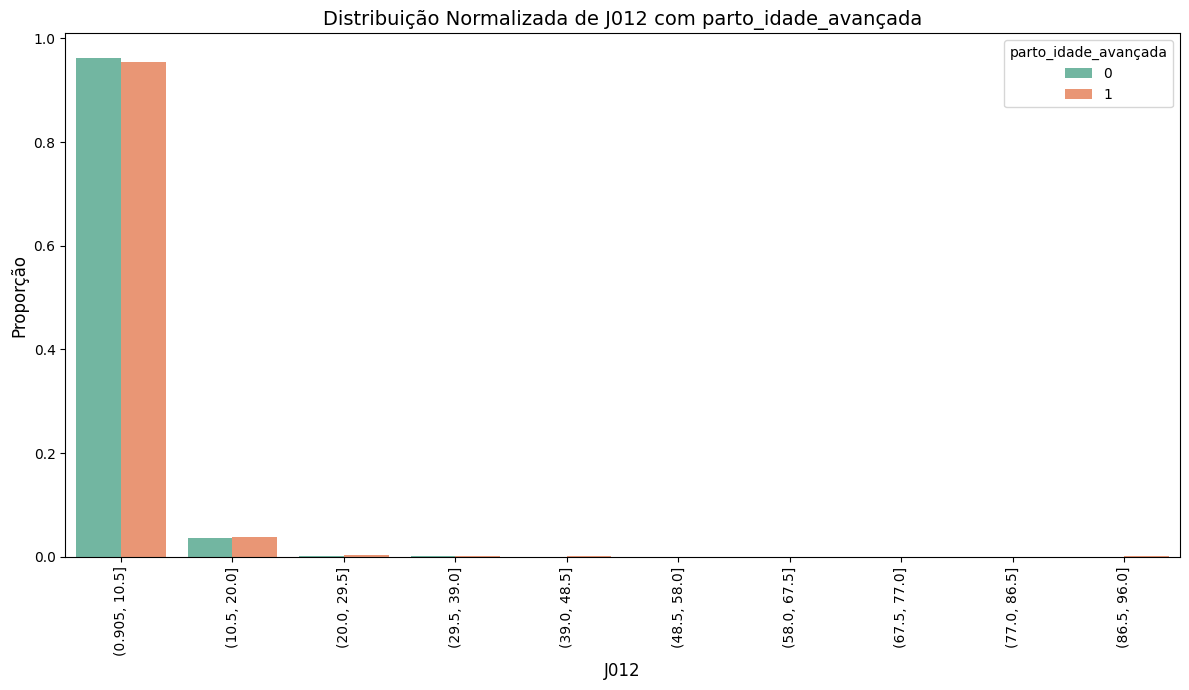

In [150]:
plot_with_hue_normalized(df_maior, 'J012', 'parto_idade_avançada')

In [ ]:
plot_with_hue_normalized(df_maior, 'raca', 'parto_idade_avançada')

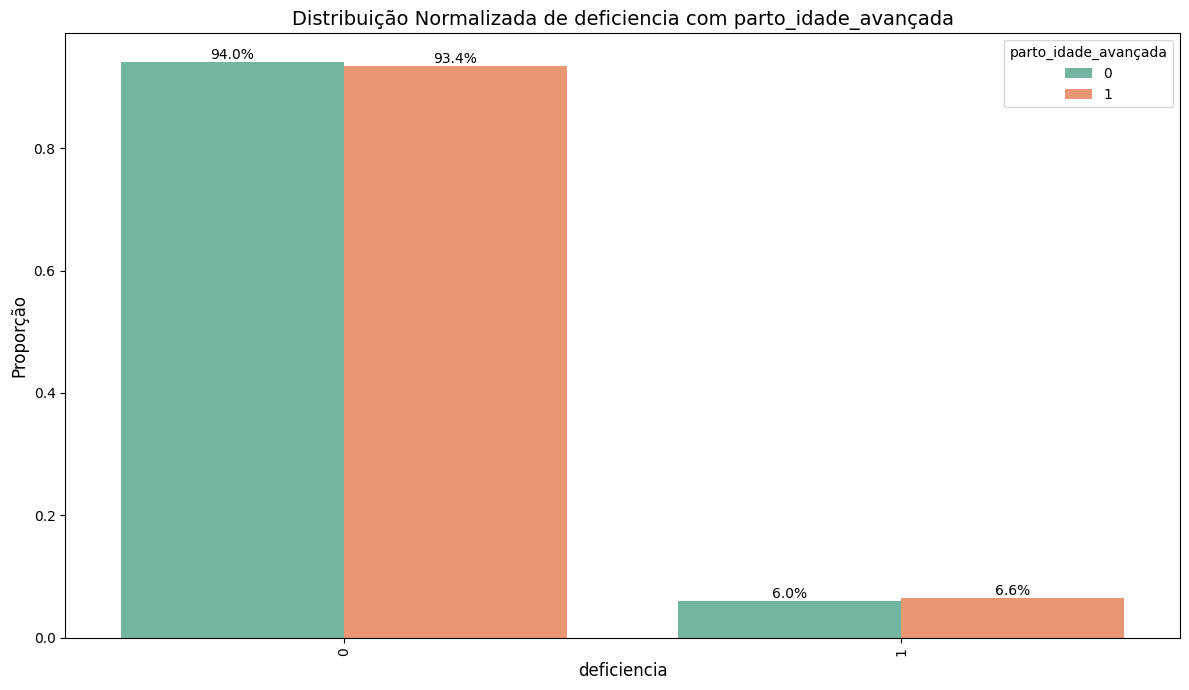

In [137]:
plot_with_hue_normalized(df_maior, 'deficiencia', 'parto_idade_avançada')